# Credit Card Fraud Detection

## Business Overview

For many banks, retaining high profitable customers is the number one business goal. Banking fraud, however, poses a significant threat to this goal for different banks. In terms of substantial financial losses, trust and credibility, this is a concerning issue to both banks and customers alike.
 
In the banking industry, credit card fraud detection using machine learning is not only a trend but a necessity for them to put proactive monitoring and fraud prevention mechanisms in place. Machine learning is helping these institutions to reduce time-consuming manual reviews, costly chargebacks and fees as well as denials of legitimate transactions.
 
## Data dictionary

The data set is taken from https://www.kaggle.com/mlg-ulb/creditcardfraud
 
The data set includes credit card transactions made by European cardholders over a period of two days in September 2013. Out of a total of 2,84,807 transactions, 492 were fraudulent. This data set is highly unbalanced, with the positive class (frauds) accounting for 0.172% of the total transactions. The data set has also been modified with principal component analysis (PCA) to maintain confidentiality. Apart from ‘time’ and ‘amount’, all the other features (V1, V2, V3, up to V28) are the principal components obtained using PCA. The feature 'time' contains the seconds elapsed between the first transaction in the data set and the subsequent transactions. The feature 'amount' is the transaction amount. The feature 'class' represents class labelling, and it takes the value of 1 in cases of fraud and 0 in others.

# Data Understanding

In [ ]:
# Import all required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier

from sklearn import metrics
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score, classification_report
from sklearn.metrics import f1_score, precision_score, recall_score
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay

from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import ADASYN

import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Read in the file
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# Shape of our data
df.shape

(284807, 31)

In [ ]:
# We will see the different feature types present in the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
# Checking descriptive statistics about the features
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


# Exploratory Data Analysis

In [ ]:
# Checking for missing values if any
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

We can see that there are no missing values in the data

Lets observe the distribution of our classes

In [ ]:
classes=df['Class'].value_counts()
normal_share=classes[0]/df['Class'].count()*100
fraud_share=classes[1]/df['Class'].count()*100
normal_share, fraud_share

(99.82725143693798, 0.1727485630620034)

Almost 99.83% of the data is of class 0 while only about 0.17% of the data belongs to class 1. We have a highly imbalanced data. We will have to handle the class imbalance during model building phase. Also, such a high class imbalance suggests we cant use accuracy as a evaluation metric. We will use ROC-AUC (Area under ROC), precision,recall or f1 score to evaluate our model performance

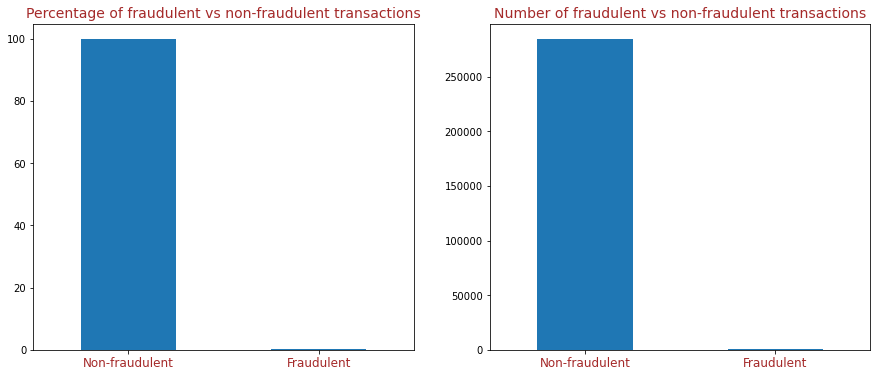

In [ ]:
# Create a bar plot for the number and percentage of fraudulent vs non-fraudulent transcations
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
(df.Class.value_counts(normalize=True)*100).plot(kind='bar')
plt.title('Percentage of fraudulent vs non-fraudulent transactions', color='brown', fontsize=14)
plt.xticks([0,1],['Non-fraudulent', 'Fraudulent'],color='brown', fontsize=12, rotation=0)

plt.subplot(1,2,2)
df.Class.value_counts().plot(kind='bar')
plt.title('Number of fraudulent vs non-fraudulent transactions', color='brown', fontsize=14)
plt.xticks([0,1],['Non-fraudulent', 'Fraudulent'],color='brown', fontsize=12, rotation=0)

plt.show()

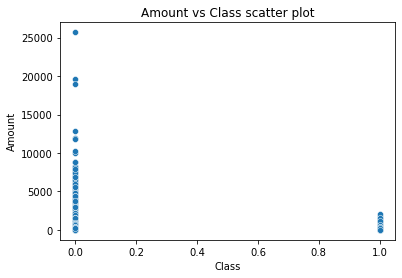

In [ ]:
# Scatter plot to observe the distribution of classes with Amount
sns.scatterplot(df.Class, df.Amount)
plt.title("Amount vs Class scatter plot")
plt.show()

It seems lower amount transactions are more likely to be fraudulent than higher amount transaction.

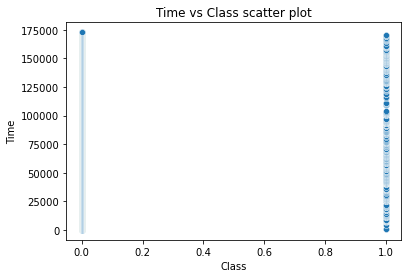

In [ ]:
# Scatter plot to observe the distribution of classes with time
sns.scatterplot(df.Class, df.Time)
plt.title("Time vs Class scatter plot")
plt.show()

Not much insight can be drawn from the distribution of transactions based on time as both fraudulent and non-fraudulent transactions are distributed over time. 

## Correlation analysis

Dropping features based on correlation

In [ ]:
# Checking the 5 features which are least correlated with our target variable Class

abs(df.corr()['Class']).sort_values()[:5]

V22    0.000805
V23    0.002685
V25    0.003308
V15    0.004223
V26    0.004455
Name: Class, dtype: float64

In [ ]:
#Dropping the 5 least correlated features

features_to_drop = list(abs(df.corr()['Class']).sort_values()[:5].index)
features_to_drop

['V22', 'V23', 'V25', 'V15', 'V26']

In [ ]:
df.drop(features_to_drop, axis=1, inplace=True)

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V17,V18,V19,V20,V21,V24,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.207971,0.025791,0.403993,0.251412,-0.018307,0.066928,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.339846,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,1.109969,-0.121359,-2.261857,0.524980,0.247998,-0.689281,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,-1.175575,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.141267,0.219422,0.215153,69.99,0


Plotting the correlation heatmap to visualize the correlation present in the data

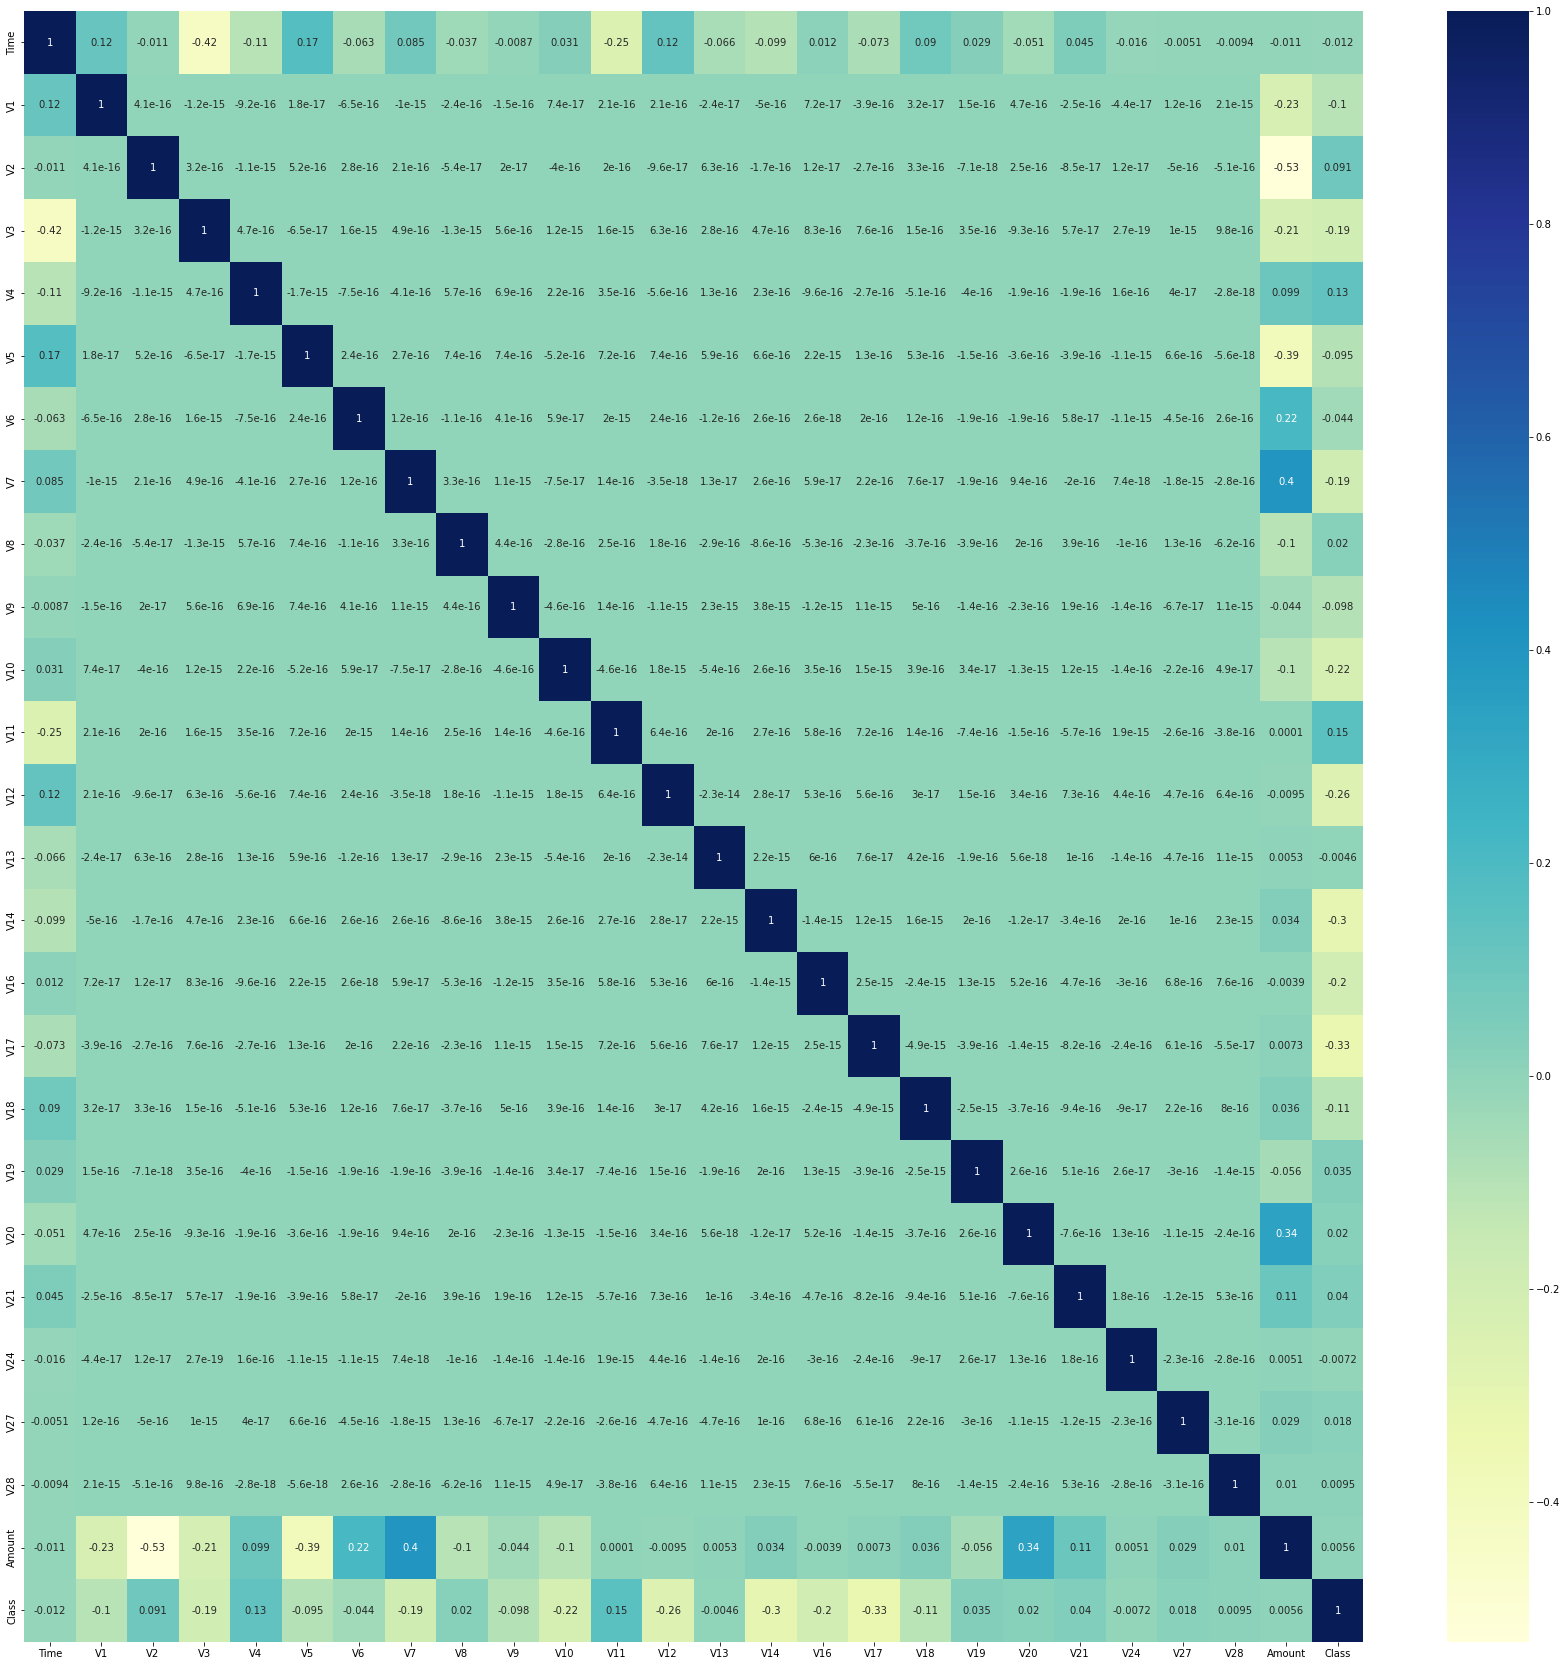

In [ ]:
plt.figure(figsize=(30,30))
sns.heatmap(df.corr(),cmap="YlGnBu", annot=True)
plt.show()

### Plotting the distributions of all the features

<Figure size 432x288 with 0 Axes>

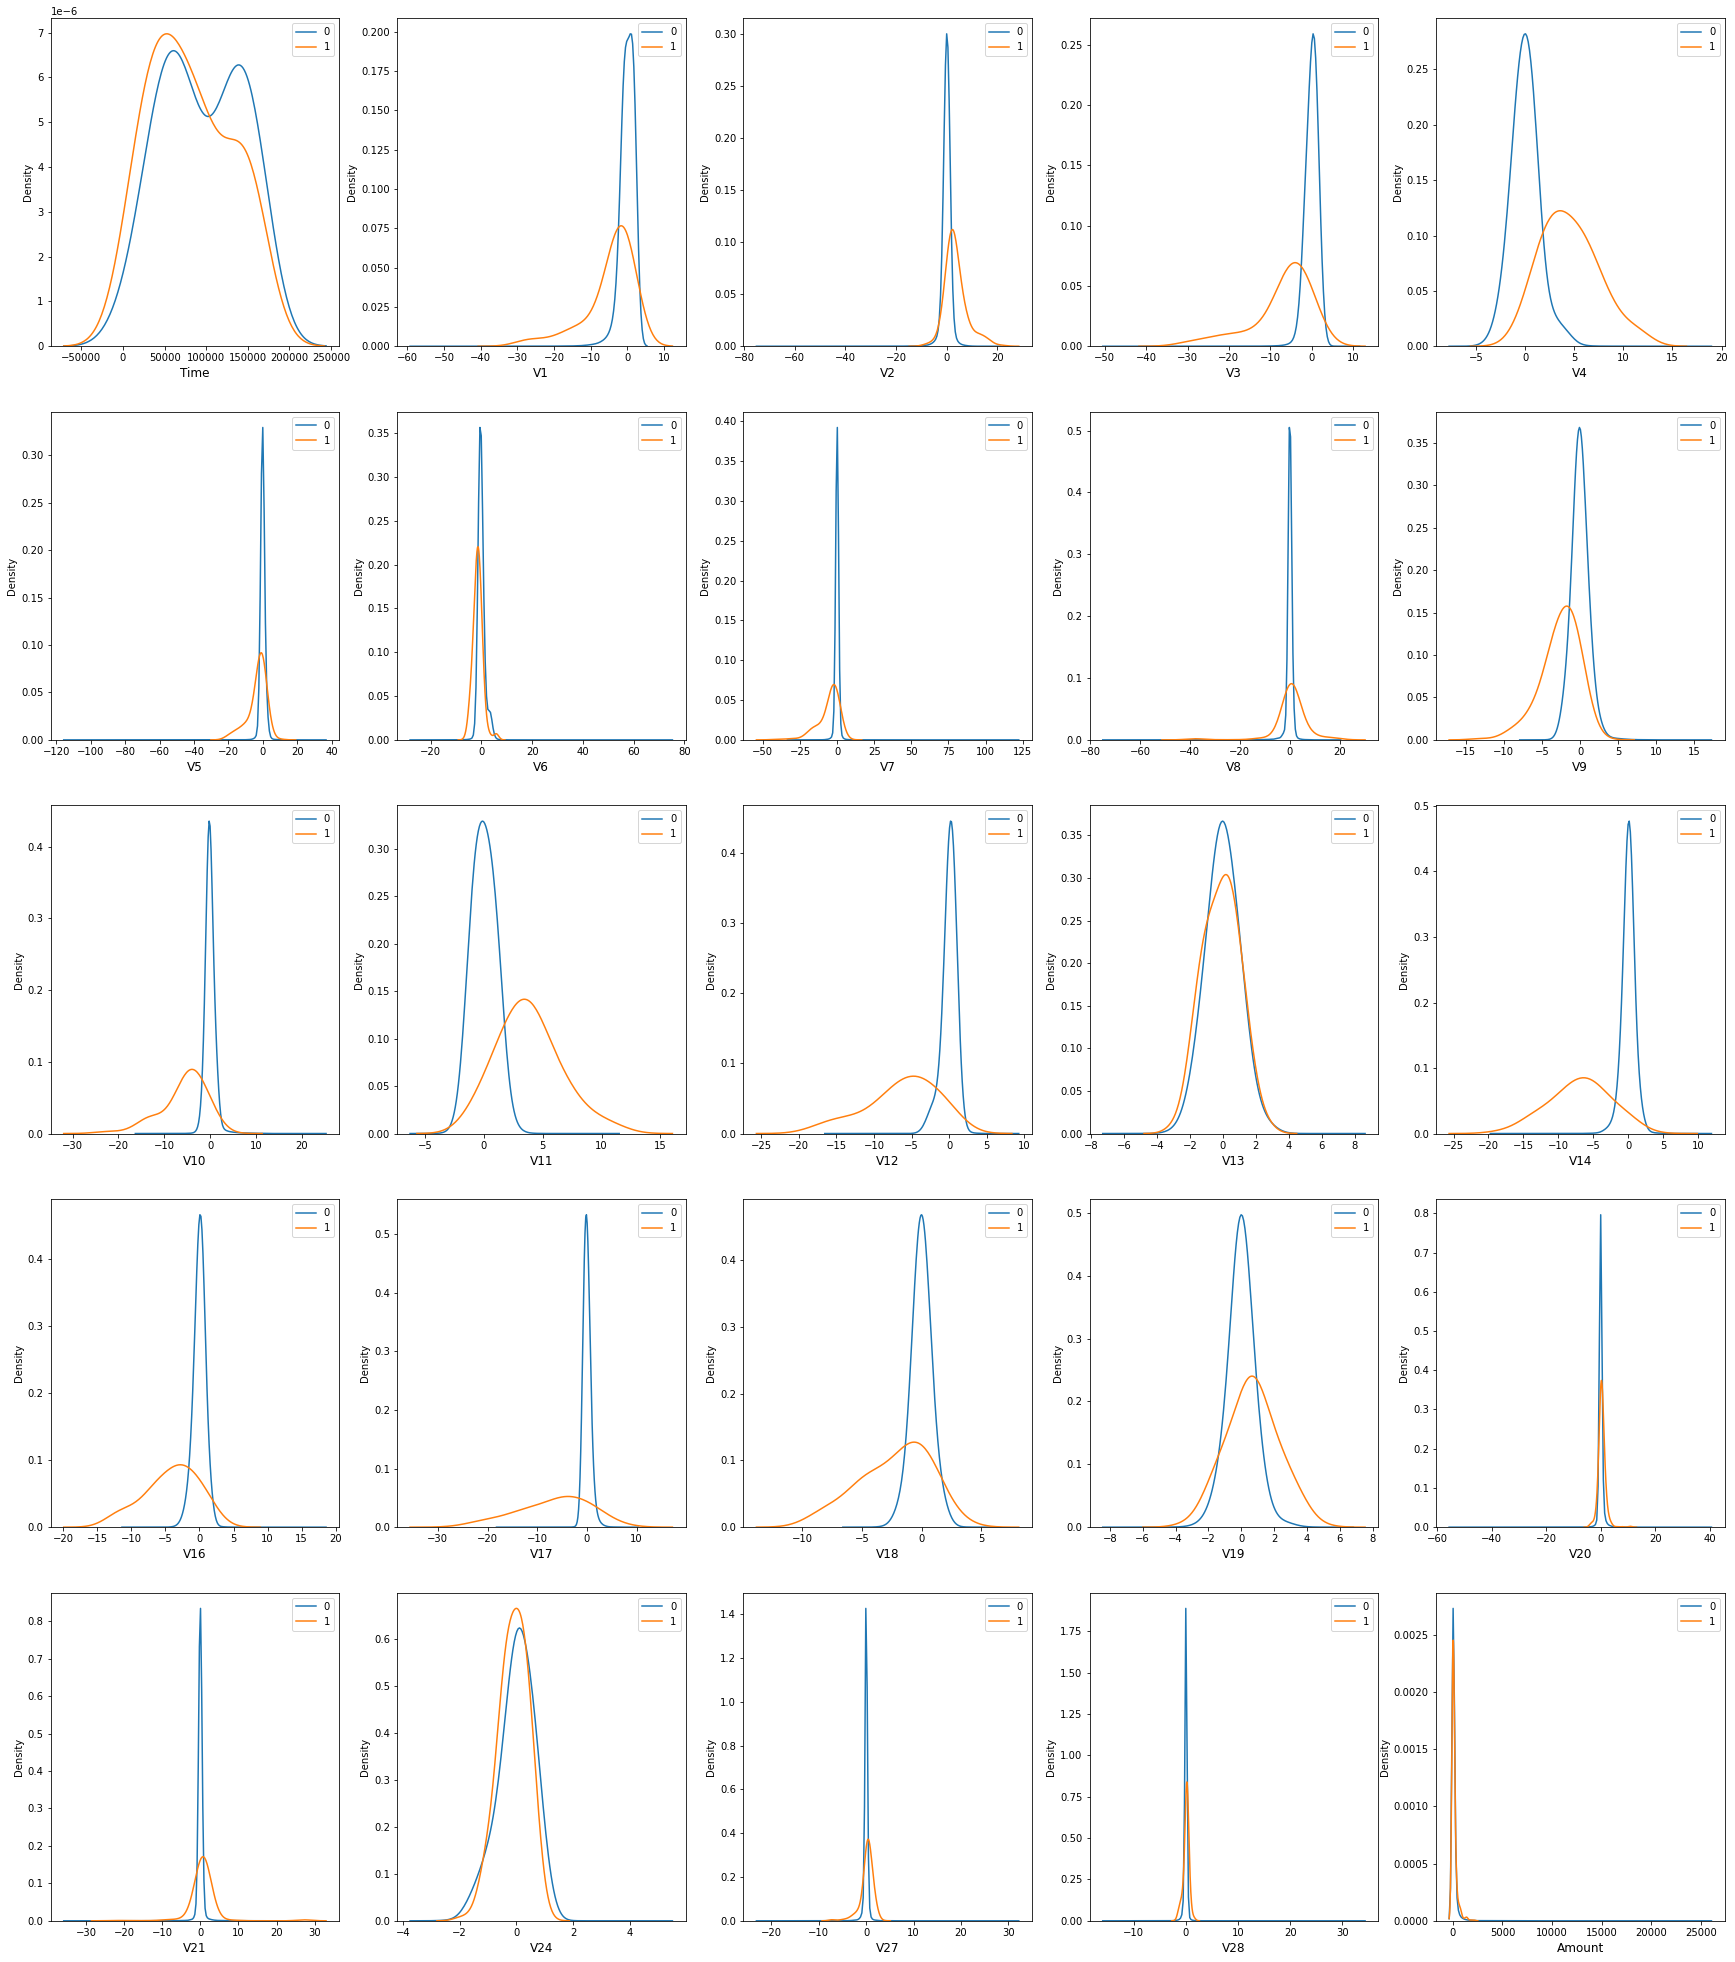

In [ ]:
# Plotting all the variable in displot to visualise the distribution
var = df.columns.to_list()
# dropping Class column from the list
var.remove("Class")

i = 0
t0 = df.loc[df['Class'] == 0]
t1 = df.loc[df['Class'] == 1]

plt.figure()
fig, ax = plt.subplots(5,5,figsize=(30,35))

for feature in var:
    i += 1
    plt.subplot(5,5,i)
    sns.kdeplot(t0[feature], bw=0.5,label="0")
    sns.kdeplot(t1[feature], bw=0.5,label="1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.legend([0,1])
plt.show();

We can see most of the features distributions are overlapping for both the fraud and non-fraud transactions

# Train Test Split

We will start building the model with the train-test split. (Close to 100 class 1 rows should be there in the test split) We will use the stratified split here with a 80:20 ratio

In [ ]:
y= df.Class
X = df.drop('Class', axis = 1)

In [ ]:
# Stratified train test split into 80:20 train test size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42, stratify=y)

In [ ]:
print(f'Percentage of fraud/non-fraud transactions in train data:\n{y_train.value_counts(normalize=True)*100}\n\n')
print(f'Percentage of fraud/non-fraud transactions in test data:\n{y_test.value_counts(normalize=True)*100}')

Percentage of fraud/non-fraud transactions in train data:
0    99.827075
1     0.172925
Name: Class, dtype: float64


Percentage of fraud/non-fraud transactions in test data:
0    99.827955
1     0.172045
Name: Class, dtype: float64


In [ ]:
# Checking the split of the class lable
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
394
98


## Feature Scaling

We need to scale `Amount` and `Time` column.

In [ ]:
# As PCA is already performed on the dataset from V1 to V28 features, we are scaling only Amount and Time field
scaler = StandardScaler()

# Scaling the train data
X_train[['Amount', 'Time']] = scaler.fit_transform(X_train[['Amount', 'Time']])

# Transforming the test data
X_test[['Amount', 'Time']] = scaler.transform(X_test[['Amount', 'Time']])

In [ ]:
X_train.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V16,V17,V18,V19,V20,V21,V24,V27,V28,Amount
265518,1.411588,1.946747,-0.752526,-1.355130,-0.661630,1.502822,4.024933,-1.479661,1.139880,1.406819,...,0.352514,-0.765670,0.141938,-0.451365,-0.134435,0.076197,0.690980,0.077641,-0.032248,-0.322494
180305,0.623141,2.035149,-0.048880,-3.058693,0.247945,2.943487,3.298697,-0.002192,0.674782,0.045826,...,-0.754029,-0.270842,-0.695698,-0.274411,-0.227279,0.038628,0.707090,0.002520,-0.069002,-0.339764
42664,-1.130680,-0.991920,0.603193,0.711976,-0.992425,-0.825838,1.956261,-2.212603,-5.037523,0.000772,...,1.123344,-0.724616,0.147255,0.004631,1.280856,-2.798352,-0.932803,0.038049,0.185340,0.346693
198723,0.794699,2.285718,-1.500239,-0.747565,-1.668119,-1.394143,-0.350339,-1.427984,0.010010,-1.118447,...,-0.065888,0.072781,0.768237,0.257424,-0.490642,-0.139670,-0.538236,0.018045,-0.063005,-0.327360
82325,-0.748102,-0.448747,-1.011440,0.115903,-3.454854,0.715771,-0.147490,0.504347,-0.113817,-0.044782,...,-2.096099,-0.399525,1.597589,-0.082746,-0.275297,-0.243245,-1.362383,-0.032580,-0.064194,-0.008281


In [ ]:
X_test.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V16,V17,V18,V19,V20,V21,V24,V27,V28,Amount
263020,1.387182,-0.674466,1.408105,-1.110622,-1.328366,1.388996,-1.308439,1.885879,-0.614233,0.311652,...,-0.741398,-0.605617,-0.392568,-0.162648,0.394322,0.080084,0.707899,0.533837,0.291319,-0.259954
11378,-1.580138,-2.829816,-2.765149,2.537793,-1.074580,2.842559,-2.153536,-1.795519,-0.250020,3.073504,...,-0.147319,-0.209328,1.058898,0.397057,-0.515765,-0.295555,0.042996,0.110802,-0.511938,-0.304426
147283,-0.138120,-3.576495,2.318422,1.306985,3.263665,1.127818,2.865246,1.444125,-0.718922,1.874046,...,-1.237941,-0.390405,-1.231804,0.098738,2.034786,-1.060151,-1.483996,0.552411,0.509764,-0.048286
219439,0.986536,2.060386,-0.015382,-1.082544,0.386019,-0.024331,-1.074935,0.207792,-0.338140,0.455091,...,-0.171173,-0.291228,-1.008531,0.097040,-0.192024,-0.281684,-0.067584,-0.063621,-0.060077,-0.347741
36939,-1.182272,1.209965,1.384303,-1.343531,1.763636,0.662351,-2.113384,0.854039,-0.475963,-0.629658,...,0.835029,2.845937,1.040947,-1.045263,0.009083,-0.164015,0.619449,0.046884,0.104527,-0.345707


### Plotting the distribution of variables to handle skewness in the data

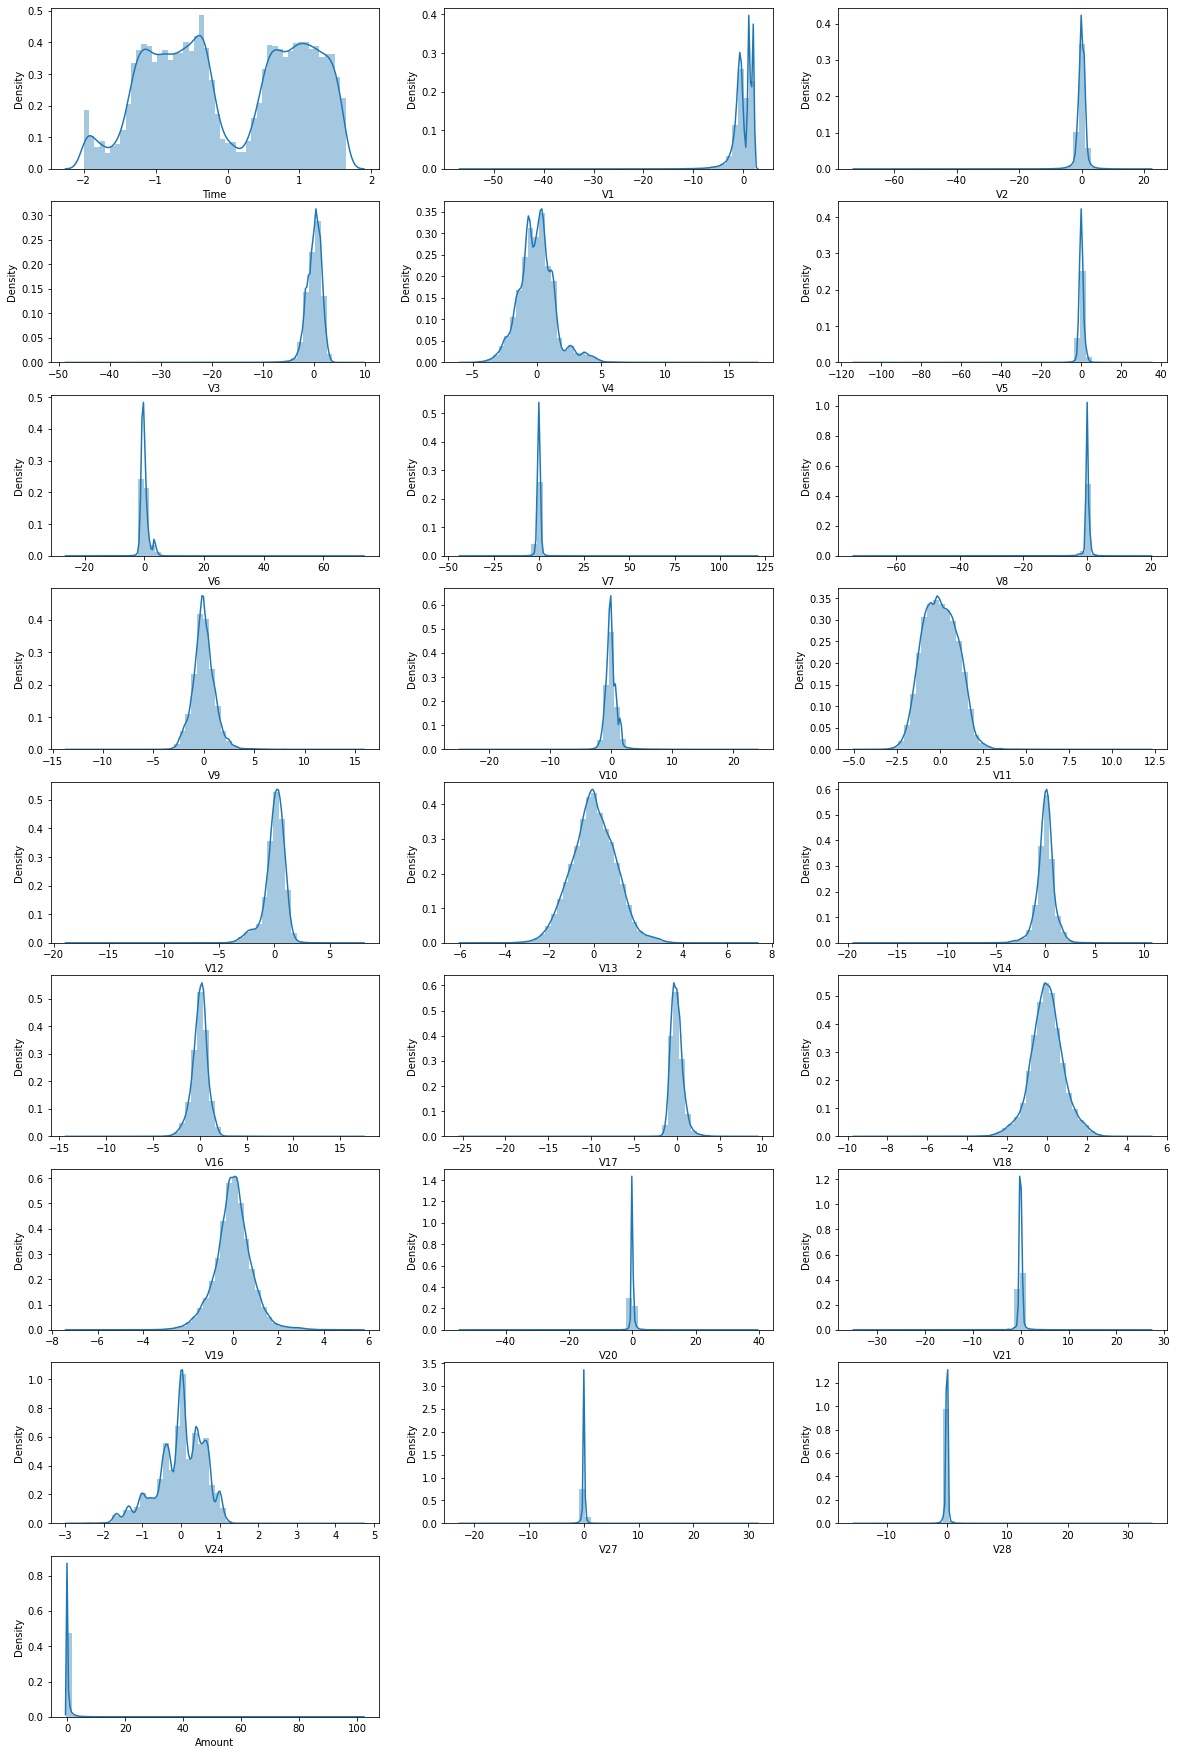

In [ ]:
# plotting the histogram of a variable from the dataset to see the skewness
var = X_train.columns

plt.figure(figsize=(20,35))
i=0
for col in var:
    i += 1
    plt.subplot(10,3, i)
    sns.distplot(X_train[col])

plt.show()

We can see that a lot of features are either highly left or right skewed. So we will check the skewness using skew() and if the skewness is beyond -1 to 1, then we will use scikit-learn's PowerTransformer to reduce the skewness of the data

In [ ]:
# Lets check the skewness of the features
var = X_train.columns

skew_list = [abs(X_train[i].skew()) for i in var]

tmp = pd.concat([pd.DataFrame(var, columns=["Features"]), pd.DataFrame(skew_list, columns=["Skewness"])], axis=1)
tmp.set_index("Features", inplace=True)
tmp.sort_values(by='Skewness', ascending=False, inplace=True)
tmp

,Skewness
Features,
Amount,18.193943
V28,9.978409
V8,8.639485
V2,4.779484
V17,3.733377
V21,3.490183
V1,3.306334
V7,3.152665
V5,2.786851


Features with a skewness of greater than 1 are either left or right skewed

In [ ]:
# Filtering the features which are right/left skewed
skewed_features = tmp[tmp.Skewness>1].index
skewed_features

Index(['Amount', 'V28', 'V8', 'V2', 'V17', 'V21', 'V1', 'V7', 'V5', 'V12',
       'V3', 'V14', 'V20', 'V6', 'V10', 'V16'],
      dtype='object', name='Features')

There is skewness present in the distribution of the above features:
- Power Transformer package present in the <b>preprocessing library provided by sklearn</b> is used to make the distribution more gaussian

In [ ]:
# Applying PowerTransformer
pt = PowerTransformer(copy=False)

# Fitting the power transformer in train data
X_train[skewed_features] = pt.fit_transform(X_train[skewed_features])


# Transforming the test data
X_test[skewed_features] = pt.transform(X_test[skewed_features])

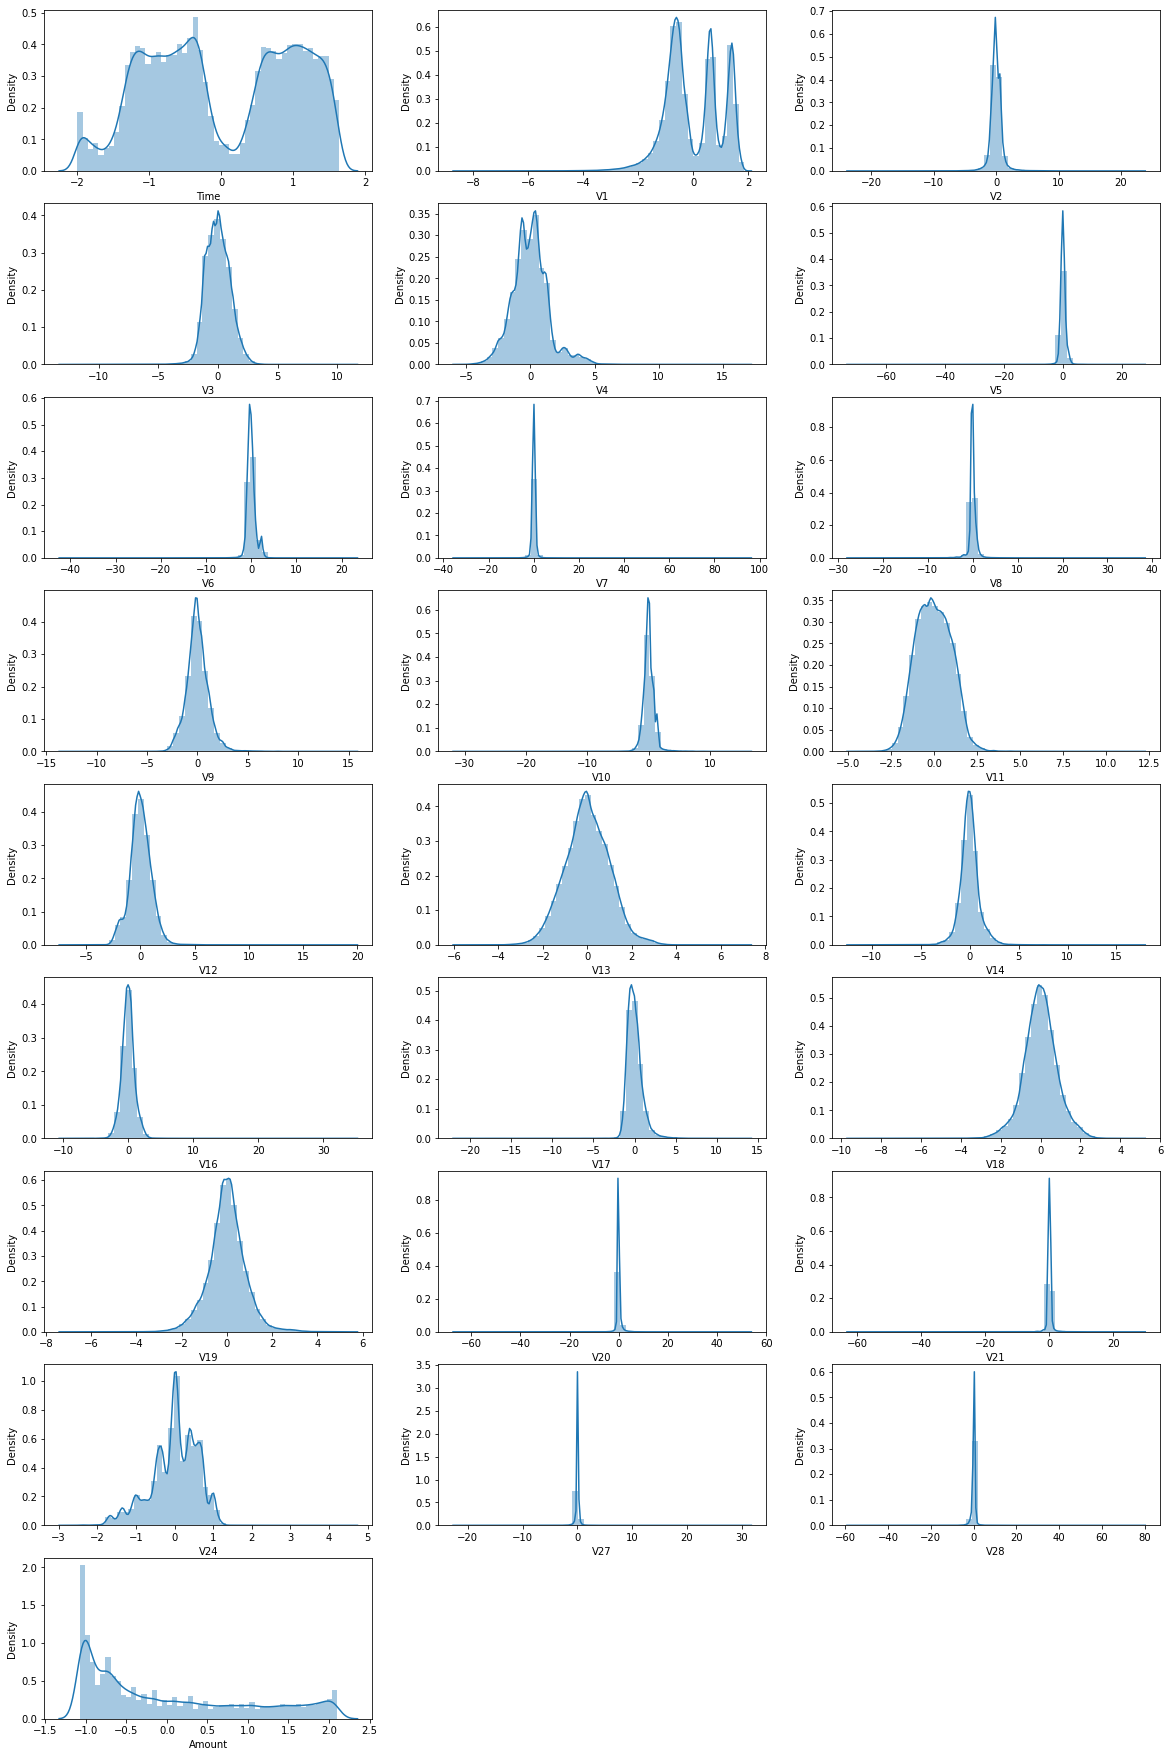

In [ ]:
# plotting the histogram of a variables from the dataset again to see the result 

var = X_train.columns

plt.figure(figsize=(20,35))
i=0
for col in var:
    i += 1
    plt.subplot(10,3, i)
    sns.distplot(X_train[col])

plt.show()

# Model Building with imbalanced data

Since the data is imbalanced, accuracy is not a good option for model evaluation. We will be using the ROC curve and the Area Under the Curve to evaluate the best performing model. 

We can’t rely on the precision, recall and F1-score alone as these metrics are dependent on some threshold value. However, ROC curve takes into cognizance all the possible threshold values.
The ROC curve is used to understand the strength of the model by evaluating the performance of the model at all the classification thresholds.

Because the ROC curve is measured at all thresholds, the best threshold would be one at which the TPR is high and FPR is low, i.e., misclassifications are low. The threshold with highest value for TPR-FPR on the train data set is usually the best cut-off. 

In [ ]:
#Create a dataframe to store results
summary_results = pd.DataFrame(columns=['Model','Precision','Recall','F1-Score','ROC-AUC','Optimal Threshold'])

In [ ]:
# Create a few helper functions

# Function to display f1 score and classification report
def display_scores(y_test, y_pred):
    '''
    Display f1 score and classification report of a model.
    '''
    print(f"F1 Score: {round(f1_score(y_test, y_pred)*100,2)}% \n") 
    print(f"Classification Report: \n {classification_report(y_test, y_pred)}")
    

# Function to get optimal threshold value of probability using ROC curve 
def get_best_threshold(actual, probs):
    '''
    Return the optimal threshold value using Youden's J statistic 
    '''
    fpr, tpr, thresholds = roc_curve(actual, probs)
    ix = np.argmax(tpr - fpr)
    return thresholds[ix] 


# Function to summarize model evaluation metrics
def model_summary(model, summary_df, y_train, y_train_pred, y_train_probs, y_test, y_test_pred, y_test_probs):
    '''
    Summarizes model evaluation metrics for train and test data. 
    Return summary_df with the test set model evaluation metrics 
    '''
    bold = '\033[1m'
    end = '\033[0m'
    
    train_precision = round(precision_score(y_train, y_train_pred)*100,2)
    train_recall = round(recall_score(y_train, y_train_pred)*100,2)
    train_f1 = round(f1_score(y_train, y_train_pred)*100,2)
    train_roc = round(roc_auc_score(y_train, y_train_probs),4)
    best_threshold = round(get_best_threshold(y_train, y_train_probs),4)
    
    test_precision = round(precision_score(y_test, y_test_pred)*100,2)
    test_recall = round(recall_score(y_test, y_test_pred)*100,2)
    test_f1 = round(f1_score(y_test, y_test_pred)*100,2)
    test_roc = round(roc_auc_score(y_test, y_test_probs),4)
    
    print(bold + f'Model Evaluation summary for {model}\n' + end)
    print(f'Optimal Threshold: {best_threshold}\n')
    print('Evaluation metrics on Training data:\n')
    print(f'Precision: {train_precision}')
    print(f'Recall: {train_recall}')
    print(f'F1 Score: {train_f1}')
    print(f'ROC-AUC score: {train_roc}')
    print('\n -----------------------------\n')
    print('Evaluation metrics on Test data: \n')
    print(f'Precision: {test_precision}')
    print(f'Recall: {test_recall}')
    print(f'F1 Score: {test_f1}')
    print(f'ROC-AUC score: {test_roc}')
    
    #Append the test set model evaluation metrics to summary_df to compare the results
    summary_df = summary_df.append({'Model':model,
                                    'Precision':test_precision, 
                                    'Recall':test_recall, 
                                    'F1-Score': test_f1, 
                                    'ROC-AUC':test_roc,
                                    'Optimal Threshold': best_threshold}, 
                                   ignore_index=True)
    summary_df.reset_index(drop=True)
    return summary_df

## Logistic Regression with imbalanced data

In [ ]:

# hyperparameter space
params = {
    'C':np.power(10.0,range(-4,4))
}

# Stratified K-Fold Cross-Validation
folds = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# perform cross validation
model_cv = GridSearchCV(estimator=LogisticRegression(),
                                  param_grid=params,
                                  scoring='roc_auc',
                                  cv=folds,
                                  n_jobs=-1,
                                  verbose=1,
                                  return_train_score=True)

model_cv.fit(X_train, y_train)

#print the evaluation result by choosing a evaluation metric
print(f'Best ROC-AUC score: {model_cv.best_score_}')

#print the optimum value of hyperparameters
print(f'Best hyperparameters: {model_cv.best_params_}')

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best ROC-AUC score: 0.9807735336575019
Best hyperparameters: {'C': 0.001}


In [ ]:
# cross validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results[['param_C','mean_test_score','mean_train_score']]

,param_C,mean_test_score,mean_train_score
0,0.0001,0.971408,0.972851
1,0.001,0.980774,0.983137
2,0.01,0.979814,0.984291
3,0.1,0.975737,0.982972
4,1.0,0.974336,0.982374
5,10.0,0.974158,0.982302
6,100.0,0.974140,0.982294
7,1000.0,0.974138,0.982294


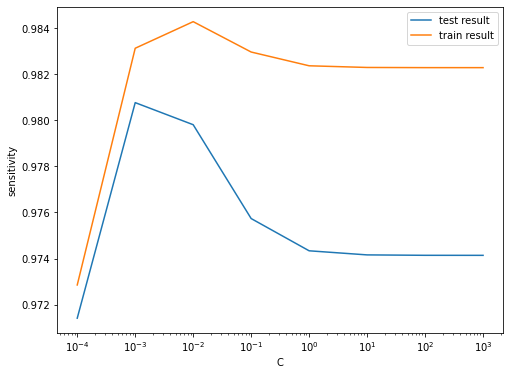

In [ ]:
# plot of C versus train and validation scores
plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='best')
plt.xscale('log')

Logistic regression with optimal C

In [ ]:
# Instantiating the model with best C
log_reg_imb_model = model_cv.best_estimator_

# Fitting the model on train dataset
log_reg_imb_model.fit(X_train, y_train)

LogisticRegression(C=0.001)

### Evaluating the model on the train set

In [ ]:
# Predictions on the train set
y_train_pred = log_reg_imb_model.predict(X_train)

# Predicted probability
y_train_probs = log_reg_imb_model.predict_proba(X_train)[:,1]

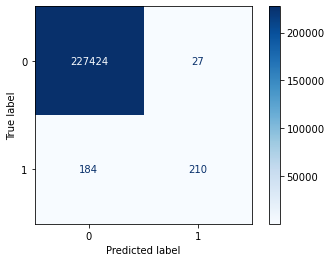

In [ ]:
ConfusionMatrixDisplay.from_estimator(log_reg_imb_model, X_train, y_train, cmap='Blues');

In [ ]:
display_scores(y_train, y_train_pred)

F1 Score: 66.56% 

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.89      0.53      0.67       394

    accuracy                           1.00    227845
   macro avg       0.94      0.77      0.83    227845
weighted avg       1.00      1.00      1.00    227845



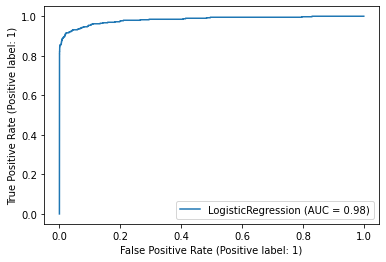

In [ ]:
# Plot the ROC curve
RocCurveDisplay.from_estimator(log_reg_imb_model, X_train, y_train);

### Evaluating the model on the test set

In [ ]:
# Making prediction on the test set
y_test_pred = log_reg_imb_model.predict(X_test)

# Predicted probability
y_test_probs = log_reg_imb_model.predict_proba(X_test)[:,1]


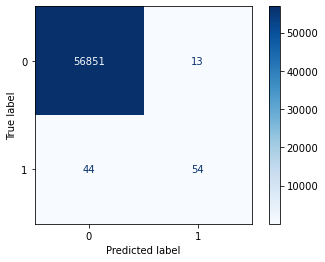

In [ ]:
ConfusionMatrixDisplay.from_estimator(log_reg_imb_model, X_test, y_test, cmap='Blues')

In [ ]:
display_scores(y_test, y_test_pred)

F1 Score: 65.45% 

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.81      0.55      0.65        98

    accuracy                           1.00     56962
   macro avg       0.90      0.78      0.83     56962
weighted avg       1.00      1.00      1.00     56962



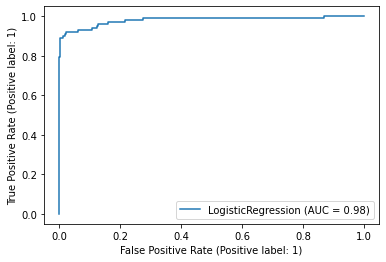

In [ ]:
RocCurveDisplay.from_estimator(log_reg_imb_model, X_test, y_test);

In [ ]:
summary_results = model_summary('Logistic Regression - Imbalanced Data', summary_results, 
                                y_train, y_train_pred, y_train_probs, y_test, y_test_pred, y_test_probs)

Model Evaluation summary for Logistic Regression - Imbalanced Data

Optimal Threshold: 0.0019

Evaluation metrics on Training data:

Precision: 88.61
Recall: 53.3
F1 Score: 66.56
ROC-AUC score: 0.9828

 -----------------------------

Evaluation metrics on Test data: 

Precision: 80.6
Recall: 55.1
F1 Score: 65.45
ROC-AUC score: 0.9795


In [ ]:
summary_results

,Model,Precision,Recall,F1-Score,ROC-AUC,Optimal Threshold
0,Logistic Regression - Imbalanced Data,80.6,55.1,65.45,0.9795,0.0019


## Decision Tree with imbalanced data

In [ ]:

# hyperparameter space

params = {
    'max_depth': range(5, 16, 5),
    'min_samples_leaf': range(50, 151, 50),
    'min_samples_split': range(50, 151, 50),
}

# Stratified K-Fold Cross-Validation
folds = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# perform cross validation
model_cv = GridSearchCV(estimator=DecisionTreeClassifier(),
                                  param_grid=params,
                                  scoring='roc_auc',
                                  cv=folds,
                                  n_jobs=-1,
                                  verbose=1,
                                  return_train_score=True)

model_cv.fit(X_train, y_train)

#print the evaluation result by choosing a evaluation metric
print(f'Best ROC-AUC score: {model_cv.best_score_}')

#print the optimum value of hyperparameters
print(f'Best hyperparameters: {model_cv.best_params_}')

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best ROC-AUC score: 0.9388324144596959
Best hyperparameters: {'max_depth': 10, 'min_samples_leaf': 50, 'min_samples_split': 100}


In [ ]:
# cross validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results[['param_min_samples_split','param_min_samples_leaf','param_max_depth','mean_test_score','mean_train_score']]

,param_min_samples_split,param_min_samples_leaf,param_max_depth,mean_test_score,mean_train_score
0,50,50,5,0.921666,0.938274
1,100,50,5,0.926760,0.938274
2,150,50,5,0.926720,0.938240
3,50,100,5,0.937245,0.950842
4,100,100,5,0.937252,0.950842
5,150,100,5,0.937245,0.950842
6,50,150,5,0.934594,0.956875
7,100,150,5,0.934594,0.956875
8,150,150,5,0.934589,0.956874
9,50,50,10,0.933927,0.986507


In [ ]:
# Instantiating the model with optimal hyperparameters
dt_imb_model = model_cv.best_estimator_

# Fitting the model on train dataset
dt_imb_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100)

### Evaluating the model on the train set

In [ ]:
# Predictions on the train set
y_train_pred = dt_imb_model.predict(X_train)

# Predicted probability
y_train_probs = dt_imb_model.predict_proba(X_train)[:,1]

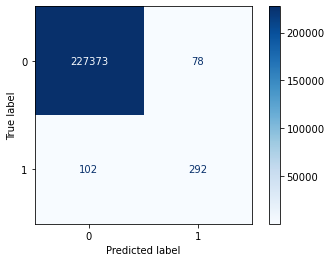

In [ ]:
ConfusionMatrixDisplay.from_estimator(dt_imb_model, X_train, y_train, cmap='Blues');

In [ ]:
display_scores(y_train, y_train_pred)

F1 Score: 76.44% 

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.79      0.74      0.76       394

    accuracy                           1.00    227845
   macro avg       0.89      0.87      0.88    227845
weighted avg       1.00      1.00      1.00    227845



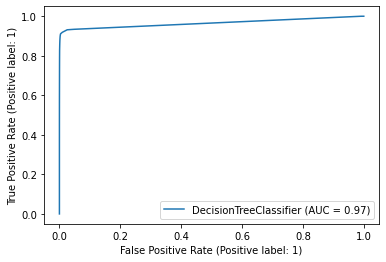

In [ ]:
# Plot the ROC curve
RocCurveDisplay.from_estimator(dt_imb_model, X_train, y_train);

### Evaluating the model on the test set

In [ ]:
# Making prediction on the test set
y_test_pred = dt_imb_model.predict(X_test)

# Predicted probability
y_test_probs = dt_imb_model.predict_proba(X_test)[:,1]


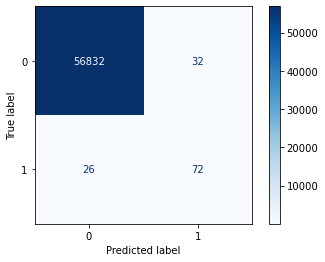

In [ ]:
ConfusionMatrixDisplay.from_estimator(dt_imb_model, X_test, y_test, cmap='Blues')

In [ ]:
display_scores(y_test, y_test_pred)

F1 Score: 71.29% 

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.69      0.73      0.71        98

    accuracy                           1.00     56962
   macro avg       0.85      0.87      0.86     56962
weighted avg       1.00      1.00      1.00     56962



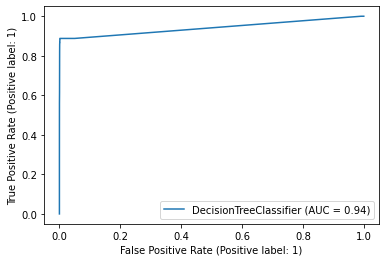

In [ ]:
RocCurveDisplay.from_estimator(dt_imb_model, X_test, y_test);

In [ ]:
summary_results = model_summary('Decision Tree - Imbalanced Data', summary_results, 
                                y_train, y_train_pred, y_train_probs, y_test, y_test_pred, y_test_probs)

Model Evaluation summary for Decision Tree - Imbalanced Data

Optimal Threshold: 0.0023

Evaluation metrics on Training data:

Precision: 78.92
Recall: 74.11
F1 Score: 76.44
ROC-AUC score: 0.9651

 -----------------------------

Evaluation metrics on Test data: 

Precision: 69.23
Recall: 73.47
F1 Score: 71.29
ROC-AUC score: 0.9414


In [ ]:
summary_results

,Model,Precision,Recall,F1-Score,ROC-AUC,Optimal Threshold
0,Logistic Regression - Imbalanced Data,80.60,55.10,65.45,0.9795,0.0019
1,Decision Tree - Imbalanced Data,69.23,73.47,71.29,0.9414,0.0023


## Random Forest with imbalanced data

In [ ]:

# hyperparameter space
params = {
    'max_depth': [10,20],
    'min_samples_leaf': [3, 5,10],
    'n_estimators': [100, 150, 200]
}

# Stratified K-Fold Cross-Validation
folds = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# perform cross validation
model_cv = GridSearchCV(estimator=RandomForestClassifier(),
                                  param_grid=params,
                                  scoring='roc_auc',
                                  cv=folds,
                                  n_jobs=-1,
                                  verbose=1,
                                  return_train_score=True)

model_cv.fit(X_train, y_train)

#print the evaluation result by choosing a evaluation metric
print(f'Best ROC-AUC score: {model_cv.best_score_}')

#print the optimum value of hyperparameters
print(f'Best hyperparameters: {model_cv.best_params_}')

Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best ROC-AUC score: 0.9770395983070269
Best hyperparameters: {'max_depth': 10, 'min_samples_leaf': 5, 'n_estimators': 200}


In [ ]:
# cross validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,83.226322,0.223228,0.434711,0.004402,10,3,100,"{'max_depth': 10, 'min_samples_leaf': 3, 'n_es...",0.974888,0.974678,0.976166,0.975244,0.000657,7,0.998907,0.997969,0.999630,0.998835,6.798568e-04
1,124.789148,0.371725,0.671272,0.016171,10,3,150,"{'max_depth': 10, 'min_samples_leaf': 3, 'n_es...",0.972072,0.971549,0.976926,0.973516,0.002421,11,0.999000,0.997107,0.999715,0.998607,1.100311e-03
2,167.884791,0.442182,0.872002,0.008232,10,3,200,"{'max_depth': 10, 'min_samples_leaf': 3, 'n_es...",0.977410,0.975183,0.976904,0.976499,0.000953,3,0.999676,0.999683,0.997730,0.999030,9.193135e-04
3,84.605402,0.264830,0.446311,0.006084,10,5,100,"{'max_depth': 10, 'min_samples_leaf': 5, 'n_es...",0.974440,0.976876,0.979270,0.976862,0.001972,2,0.999526,0.999396,0.999567,0.999497,7.272410e-05
4,125.276127,0.550340,0.673577,0.010497,10,5,150,"{'max_depth': 10, 'min_samples_leaf': 5, 'n_es...",0.975147,0.974411,0.976251,0.975270,0.000756,6,0.998794,0.999557,0.998326,0.998892,5.074454e-04
5,165.798026,0.527023,0.900017,0.011489,10,5,200,"{'max_depth': 10, 'min_samples_leaf': 5, 'n_es...",0.977920,0.973529,0.979670,0.977040,0.002583,1,0.999644,0.999294,0.999605,0.999514,1.567033e-04
6,83.715462,0.311823,0.477180,0.008893,10,10,100,"{'max_depth': 10, 'min_samples_leaf': 10, 'n_e...",0.974886,0.974160,0.978935,0.975994,0.002101,4,0.998188,0.997652,0.998334,0.998058,2.932581e-04
7,126.062767,0.409537,0.667846,0.012804,10,10,150,"{'max_depth': 10, 'min_samples_leaf': 10, 'n_e...",0.973570,0.971176,0.979148,0.974631,0.003340,8,0.998415,0.999336,0.998672,0.998808,3.877454e-04
8,169.390752,0.249704,0.905883,0.009446,10,10,200,"{'max_depth': 10, 'min_samples_leaf': 10, 'n_e...",0.977475,0.970883,0.977985,0.975447,0.003235,5,0.998882,0.999022,0.999067,0.998990,7.897284e-05
9,119.665498,0.319945,0.673253,0.007173,20,3,100,"{'max_depth': 20, 'min_samples_leaf': 3, 'n_es...",0.959143,0.948751,0.967968,0.958621,0.007854,18,0.999971,0.999970,0.999972,0.999971,7.587561e-07


In [ ]:
# Instantiating the model with optimal hyperparameters
rf_imb_model = model_cv.best_estimator_

# Fitting the model on train dataset
rf_imb_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=5, n_estimators=200)

### Evaluating the model on the train set

In [ ]:
# Predictions on the train set
y_train_pred = rf_imb_model.predict(X_train)

# Predicted probability
y_train_probs = rf_imb_model.predict_proba(X_train)[:,1]

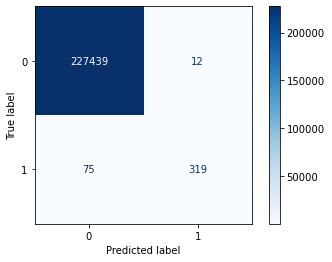

In [ ]:
ConfusionMatrixDisplay.from_estimator(rf_imb_model, X_train, y_train, cmap='Blues');

In [ ]:
display_scores(y_train, y_train_pred)

F1 Score: 88.0% 

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.96      0.81      0.88       394

    accuracy                           1.00    227845
   macro avg       0.98      0.90      0.94    227845
weighted avg       1.00      1.00      1.00    227845



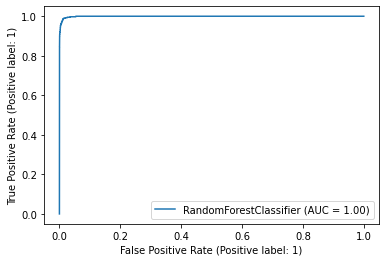

In [ ]:
# Plot the ROC curve
RocCurveDisplay.from_estimator(rf_imb_model, X_train, y_train);

### Evaluating the model on the test set

In [ ]:
# Making prediction on the test set
y_test_pred = rf_imb_model.predict(X_test)

# Predicted probability
y_test_probs = rf_imb_model.predict_proba(X_test)[:,1]


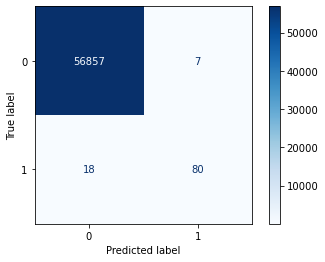

In [ ]:
ConfusionMatrixDisplay.from_estimator(rf_imb_model, X_test, y_test, cmap='Blues')

In [ ]:
display_scores(y_test, y_test_pred)

F1 Score: 86.49% 

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.92      0.82      0.86        98

    accuracy                           1.00     56962
   macro avg       0.96      0.91      0.93     56962
weighted avg       1.00      1.00      1.00     56962



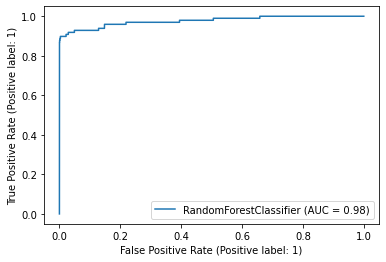

In [ ]:
RocCurveDisplay.from_estimator(rf_imb_model, X_test, y_test);

In [ ]:
summary_results = model_summary('Random Forest - Imbalanced Data', summary_results, 
                                y_train, y_train_pred, y_train_probs, y_test, y_test_pred, y_test_probs)

Model Evaluation summary for Random Forest - Imbalanced Data

Optimal Threshold: 0.0027

Evaluation metrics on Training data:

Precision: 96.37
Recall: 80.96
F1 Score: 88.0
ROC-AUC score: 0.9992

 -----------------------------

Evaluation metrics on Test data: 

Precision: 91.95
Recall: 81.63
F1 Score: 86.49
ROC-AUC score: 0.9764


In [ ]:
summary_results

,Model,Precision,Recall,F1-Score,ROC-AUC,Optimal Threshold
0,Logistic Regression - Imbalanced Data,80.60,55.10,65.45,0.9795,0.0019
1,Decision Tree - Imbalanced Data,69.23,73.47,71.29,0.9414,0.0023
2,Random Forest - Imbalanced Data,91.95,81.63,86.49,0.9764,0.0027


## XGBoost with imbalanced data

In [ ]:

# hyperparameter space
params = {
    'max_depth': [2,5],
    'n_estimators': [100,200],
    'learning_rate': [0.1, 0.2]
    }     

# Stratified K-Fold Cross-Validation
folds = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# perform cross validation
model_cv = GridSearchCV(estimator=XGBClassifier(subsample=0.8, 
                                                colsample_bytree=0.5,
                                                use_label_encoder=False),
                        param_grid=params,
                        scoring='roc_auc',
                        cv=folds,
                        n_jobs=-1,
                        verbose=1,
                        return_train_score=True)

model_cv.fit(X_train, y_train, eval_metric='logloss')

#print the evaluation result by choosing a evaluation metric
print(f'Best ROC-AUC score: {model_cv.best_score_}')

#print the optimum value of hyperparameters
print(f'Best hyperparameters: {model_cv.best_params_}')

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best ROC-AUC score: 0.9834785435271494
Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 200}


In [ ]:
# cross validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,14.529932,0.233070,0.058340,0.001000,0.1,2,100,"{'learning_rate': 0.1, 'max_depth': 2, 'n_esti...",0.980237,0.980438,0.983935,0.981537,0.001698,5,0.993926,0.994935,0.993208,0.994023,0.000708
1,29.183216,0.095807,0.077220,0.018995,0.1,2,200,"{'learning_rate': 0.1, 'max_depth': 2, 'n_esti...",0.982809,0.980655,0.986971,0.983479,0.002622,1,0.998080,0.998301,0.998187,0.998189,0.000090
2,36.336143,0.317103,0.084123,0.000769,0.1,5,100,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.979252,0.977377,0.988550,0.981726,0.004886,3,0.999873,0.999729,0.999892,0.999831,0.000073
3,69.896798,2.061300,0.121730,0.007204,0.1,5,200,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.975375,0.977568,0.985529,0.979491,0.004363,8,1.000000,1.000000,1.000000,1.000000,0.000000
4,15.108658,0.248977,0.073474,0.011518,0.2,2,100,"{'learning_rate': 0.2, 'max_depth': 2, 'n_esti...",0.983595,0.978357,0.984638,0.982197,0.002748,2,0.997994,0.997823,0.998069,0.997962,0.000103
5,30.442404,0.374049,0.096608,0.037646,0.2,2,200,"{'learning_rate': 0.2, 'max_depth': 2, 'n_esti...",0.979277,0.973333,0.986432,0.979681,0.005356,7,0.999833,0.999674,0.999787,0.999765,0.000067
6,34.576501,2.722145,0.083009,0.012315,0.2,5,100,"{'learning_rate': 0.2, 'max_depth': 5, 'n_esti...",0.978025,0.979162,0.987062,0.981416,0.004019,6,1.000000,1.000000,1.000000,1.000000,0.000000
7,33.691425,3.807291,0.089518,0.011806,0.2,5,200,"{'learning_rate': 0.2, 'max_depth': 5, 'n_esti...",0.979335,0.980060,0.985661,0.981685,0.002827,4,1.000000,1.000000,1.000000,1.000000,0.000000


In [ ]:
# Instantiating the model with optimal hyperparameters
xgb_imb_model = model_cv.best_estimator_

# Fitting the model on train dataset
xgb_imb_model.fit(X_train, y_train, eval_metric='logloss')

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=0.8, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

### Evaluating the model on the train set

In [ ]:
# Predictions on the train set
y_train_pred = xgb_imb_model.predict(X_train)

# Predicted probability
y_train_probs = xgb_imb_model.predict_proba(X_train)[:,1]

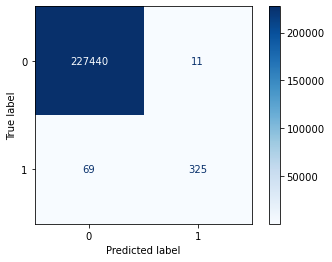

In [ ]:
ConfusionMatrixDisplay.from_estimator(xgb_imb_model, X_train, y_train, cmap='Blues');

In [ ]:
display_scores(y_train, y_train_pred)

F1 Score: 89.04% 

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.97      0.82      0.89       394

    accuracy                           1.00    227845
   macro avg       0.98      0.91      0.95    227845
weighted avg       1.00      1.00      1.00    227845



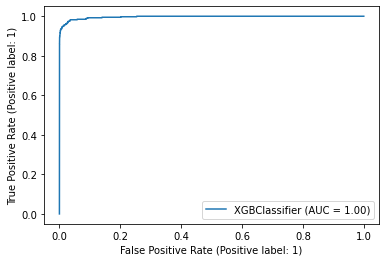

In [ ]:
# Plot the ROC curve
RocCurveDisplay.from_estimator(xgb_imb_model, X_train, y_train);

### Evaluating the model on the test set

In [ ]:
# Making prediction on the test set
y_test_pred = xgb_imb_model.predict(X_test)

# Predicted probability
y_test_probs = xgb_imb_model.predict_proba(X_test)[:,1]


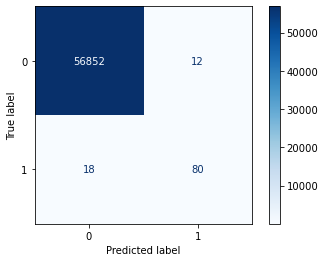

In [ ]:
ConfusionMatrixDisplay.from_estimator(xgb_imb_model, X_test, y_test, cmap='Blues')

In [ ]:
display_scores(y_test, y_test_pred)

F1 Score: 84.21% 

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.87      0.82      0.84        98

    accuracy                           1.00     56962
   macro avg       0.93      0.91      0.92     56962
weighted avg       1.00      1.00      1.00     56962



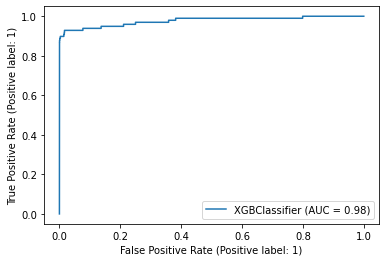

In [ ]:
RocCurveDisplay.from_estimator(xgb_imb_model, X_test, y_test);

In [ ]:
summary_results = model_summary('XGBoost - Imbalanced Data', summary_results, 
                                y_train, y_train_pred, y_train_probs, y_test, y_test_pred, y_test_probs)

Model Evaluation summary for XGBoost - Imbalanced Data

Optimal Threshold: 0.00139999995008111

Evaluation metrics on Training data:

Precision: 96.73
Recall: 82.49
F1 Score: 89.04
ROC-AUC score: 0.9966

 -----------------------------

Evaluation metrics on Test data: 

Precision: 86.96
Recall: 81.63
F1 Score: 84.21
ROC-AUC score: 0.9768


In [ ]:
summary_results

,Model,Precision,Recall,F1-Score,ROC-AUC,Optimal Threshold
0,Logistic Regression - Imbalanced Data,80.60,55.10,65.45,0.9795,0.0019
1,Decision Tree - Imbalanced Data,69.23,73.47,71.29,0.9414,0.0023
2,Random Forest - Imbalanced Data,91.95,81.63,86.49,0.9764,0.0027
3,XGBoost - Imbalanced Data,86.96,81.63,84.21,0.9768,0.0014


# Model building with balancing Classes

We are going to perform below over sampling approaches for handling data imbalance and we will pick the best approach based on model performance.
- Random Oversampling
- SMOTE
- ADASYN

# Random Oversampling

In [ ]:
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X_train, y_train)

In [ ]:
from collections import Counter
# Befor sampling class distribution
print('Before sampling class distribution:-',Counter(y_train))
# new class distribution 
print('New class distribution:-',Counter(y_over))

Before sampling class distribution:- Counter({0: 227451, 1: 394})
New class distribution:- Counter({0: 227451, 1: 227451})


## Logistic Regrassion with Random Oversampling

In [ ]:

# hyperparameter space
params = {
    'C':np.power(10.0,range(-4,4))
}

# Stratified K-Fold Cross-Validation
folds = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# perform cross validation
model_cv = GridSearchCV(estimator=LogisticRegression(),
                                  param_grid=params,
                                  scoring='roc_auc',
                                  cv=folds,
                                  n_jobs=-1,
                                  verbose=1,
                                  return_train_score=True)

# Fit the model
model_cv.fit(X_over, y_over)

#print the evaluation result by choosing a evaluation metric
print(f'Best ROC-AUC score: {model_cv.best_score_}')

#print the optimum value of hyperparameters
print(f'Best hyperparameters: {model_cv.best_params_}')

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best ROC-AUC score: 0.9873659598291747
Best hyperparameters: {'C': 10.0}


In [ ]:
# cross validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results[['param_C','mean_test_score','mean_train_score']]

,param_C,mean_test_score,mean_train_score
0,0.0001,0.986381,0.986389
1,0.001,0.986832,0.986842
2,0.01,0.987280,0.987292
3,0.1,0.987357,0.987371
4,1.0,0.987366,0.987378
5,10.0,0.987366,0.987379
6,100.0,0.987366,0.987379
7,1000.0,0.987366,0.987379


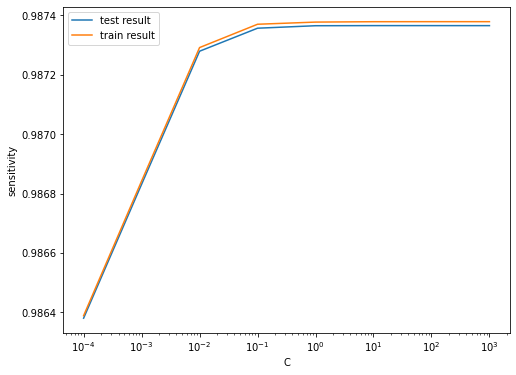

In [ ]:
# plot of C versus train and validation scores
plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='best')
plt.xscale('log')

Logistic regression with optimal C

In [ ]:
# Instantiating the model with best C
log_reg_over = model_cv.best_estimator_

# Fitting the model on train dataset
log_reg_over.fit(X_over, y_over)

LogisticRegression(C=10.0)

### Evaluating the model on the train set

In [ ]:
# Predictions on the train set
y_train_pred = log_reg_over.predict(X_over)

# Predicted probability
y_train_probs = log_reg_over.predict_proba(X_over)[:,1]

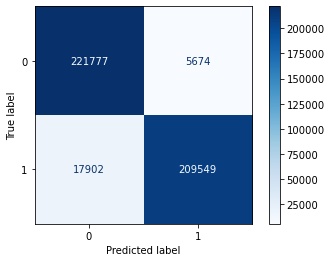

In [ ]:
ConfusionMatrixDisplay.from_estimator(log_reg_over, X_over, y_over, cmap='Blues');

In [ ]:
display_scores(y_over, y_train_pred)

F1 Score: 94.67% 

Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.98      0.95    227451
           1       0.97      0.92      0.95    227451

    accuracy                           0.95    454902
   macro avg       0.95      0.95      0.95    454902
weighted avg       0.95      0.95      0.95    454902



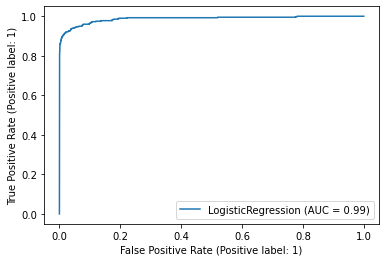

In [ ]:
# Plot the ROC curve
RocCurveDisplay.from_estimator(log_reg_over, X_over, y_over);

### Evaluating the model on the test set

In [ ]:
# Making prediction on the test set
y_test_pred = log_reg_over.predict(X_test)

# Predicted probability
y_test_probs = log_reg_over.predict_proba(X_test)[:,1]


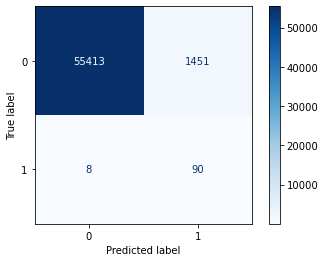

In [ ]:
ConfusionMatrixDisplay.from_estimator(log_reg_over, X_test, y_test, cmap='Blues')

In [ ]:
display_scores(y_test, y_test_pred)

F1 Score: 10.98% 

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.97      0.99     56962



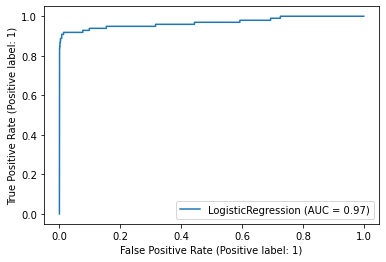

In [ ]:
RocCurveDisplay.from_estimator(log_reg_over, X_test, y_test);

In [ ]:
summary_results = model_summary('Logistic Regression - Random Oversampling', summary_results, 
                                y_over, y_train_pred, y_train_probs, y_test, y_test_pred, y_test_probs)

Model Evaluation summary for Logistic Regression - Random Oversampling

Optimal Threshold: 0.5333

Evaluation metrics on Training data:

Precision: 97.36
Recall: 92.13
F1 Score: 94.67
ROC-AUC score: 0.9874

 -----------------------------

Evaluation metrics on Test data: 

Precision: 5.84
Recall: 91.84
F1 Score: 10.98
ROC-AUC score: 0.9678


In [ ]:
summary_results

,Model,Precision,Recall,F1-Score,ROC-AUC,Optimal Threshold
0,Logistic Regression - Imbalanced Data,80.60,55.10,65.45,0.9795,0.0019
1,Decision Tree - Imbalanced Data,69.23,73.47,71.29,0.9414,0.0023
2,Random Forest - Imbalanced Data,91.95,81.63,86.49,0.9764,0.0027
3,XGBoost - Imbalanced Data,86.96,81.63,84.21,0.9768,0.0014
4,Logistic Regression - Random Oversampling,5.84,91.84,10.98,0.9678,0.5333


## Decision Tree with Random Oversampling

In [ ]:

# hyperparameter space

params = {
    'max_depth': range(5, 16, 5),
    'min_samples_leaf': range(50, 151, 50),
    'min_samples_split': range(50, 151, 50),
}

# Stratified K-Fold Cross-Validation
folds = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# perform cross validation
model_cv = GridSearchCV(estimator=DecisionTreeClassifier(),
                                  param_grid=params,
                                  scoring='roc_auc',
                                  cv=folds,
                                  n_jobs=-1,
                                  verbose=1,
                                  return_train_score=True)

model_cv.fit(X_over, y_over)

#print the evaluation result by choosing a evaluation metric
print(f'Best ROC-AUC score: {model_cv.best_score_}')

#print the optimum value of hyperparameters
print(f'Best hyperparameters: {model_cv.best_params_}')

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best ROC-AUC score: 0.9997081886973582
Best hyperparameters: {'max_depth': 15, 'min_samples_leaf': 50, 'min_samples_split': 50}


In [ ]:
# cross validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results[['param_min_samples_split','param_min_samples_leaf','param_max_depth','mean_test_score','mean_train_score']]

,param_min_samples_split,param_min_samples_leaf,param_max_depth,mean_test_score,mean_train_score
0,50,50,5,0.986995,0.987009
1,100,50,5,0.986995,0.987009
2,150,50,5,0.986995,0.987009
3,50,100,5,0.986952,0.986956
4,100,100,5,0.986952,0.986956
5,150,100,5,0.986952,0.986956
6,50,150,5,0.986947,0.986976
7,100,150,5,0.986947,0.986976
8,150,150,5,0.986947,0.986976
9,50,50,10,0.999540,0.999678


In [ ]:
# Instantiating the model with optimal hyperparameters
dt_over = model_cv.best_estimator_

# Fitting the model on train dataset
dt_over.fit(X_over, y_over)

DecisionTreeClassifier(max_depth=15, min_samples_leaf=50, min_samples_split=50)

### Evaluating the model on the train set

In [ ]:
# Predictions on the train set
y_train_pred = dt_over.predict(X_over)

# Predicted probability
y_train_probs = dt_over.predict_proba(X_over)[:,1]

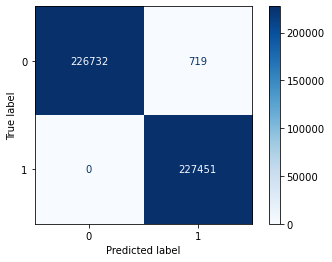

In [ ]:
ConfusionMatrixDisplay.from_estimator(dt_over, X_over, y_over, cmap='Blues');

In [ ]:
display_scores(y_over, y_train_pred)

F1 Score: 99.84% 

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00    227451

    accuracy                           1.00    454902
   macro avg       1.00      1.00      1.00    454902
weighted avg       1.00      1.00      1.00    454902



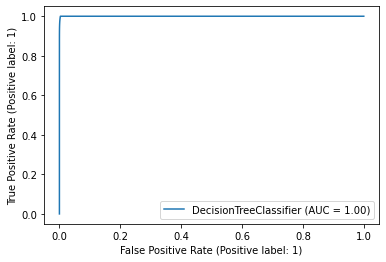

In [ ]:
# Plot the ROC curve
RocCurveDisplay.from_estimator(dt_over, X_over, y_over);

### Evaluating the model on the test set

In [ ]:
# Making prediction on the test set
y_test_pred = dt_over.predict(X_test)

# Predicted probability
y_test_probs = dt_over.predict_proba(X_test)[:,1]


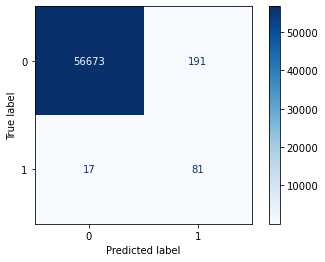

In [ ]:
ConfusionMatrixDisplay.from_estimator(dt_over, X_test, y_test, cmap='Blues')

In [ ]:
display_scores(y_test, y_test_pred)

F1 Score: 43.78% 

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.30      0.83      0.44        98

    accuracy                           1.00     56962
   macro avg       0.65      0.91      0.72     56962
weighted avg       1.00      1.00      1.00     56962



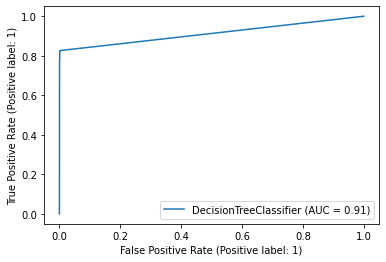

In [ ]:
RocCurveDisplay.from_estimator(dt_over, X_test, y_test);

In [ ]:
summary_results = model_summary('Decision Tree - Random Oversampling', summary_results, 
                                y_over, y_train_pred, y_train_probs, y_test, y_test_pred, y_test_probs)

Model Evaluation summary for Decision Tree - Random Oversampling

Optimal Threshold: 0.8983

Evaluation metrics on Training data:

Precision: 99.68
Recall: 100.0
F1 Score: 99.84
ROC-AUC score: 0.9999

 -----------------------------

Evaluation metrics on Test data: 

Precision: 29.78
Recall: 82.65
F1 Score: 43.78
ROC-AUC score: 0.9128


In [ ]:
summary_results

,Model,Precision,Recall,F1-Score,ROC-AUC,Optimal Threshold
0,Logistic Regression - Imbalanced Data,80.60,55.10,65.45,0.9795,0.0019
1,Decision Tree - Imbalanced Data,69.23,73.47,71.29,0.9414,0.0023
2,Random Forest - Imbalanced Data,91.95,81.63,86.49,0.9764,0.0027
3,XGBoost - Imbalanced Data,86.96,81.63,84.21,0.9768,0.0014
4,Logistic Regression - Random Oversampling,5.84,91.84,10.98,0.9678,0.5333
5,Decision Tree - Random Oversampling,29.78,82.65,43.78,0.9128,0.8983


## Random Forest with Random Oversampling

In [ ]:

# hyperparameter space
params = {
    'max_depth': [10,20],
    'min_samples_leaf': [2, 3, 5],
    'n_estimators': [100, 150, 200]
}

# Stratified K-Fold Cross-Validation
folds = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# perform cross validation
model_cv = GridSearchCV(estimator=RandomForestClassifier(),
                                  param_grid=params,
                                  scoring='roc_auc',
                                  cv=folds,
                                  n_jobs=-1,
                                  verbose=1,
                                  return_train_score=True)

model_cv.fit(X_over, y_over)

#print the evaluation result by choosing a evaluation metric
print(f'Best ROC-AUC score: {model_cv.best_score_}')

#print the optimum value of hyperparameters
print(f'Best hyperparameters: {model_cv.best_params_}')

Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best ROC-AUC score: 1.0
Best hyperparameters: {'max_depth': 20, 'min_samples_leaf': 2, 'n_estimators': 100}


In [ ]:
# cross validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,92.513260,0.358906,1.158906,0.013714,10,2,100,"{'max_depth': 10, 'min_samples_leaf': 2, 'n_es...",0.999968,0.999960,0.999961,0.999963,3.809656e-06,16,0.999977,0.999982,0.999981,0.999980,2.312761e-06
1,139.653085,0.191724,1.697523,0.013811,10,2,150,"{'max_depth': 10, 'min_samples_leaf': 2, 'n_es...",0.999976,0.999966,0.999972,0.999971,4.265155e-06,11,0.999986,0.999984,0.999986,0.999985,9.840847e-07
2,186.903985,2.291059,2.255717,0.015534,10,2,200,"{'max_depth': 10, 'min_samples_leaf': 2, 'n_es...",0.999975,0.999970,0.999969,0.999971,2.894830e-06,12,0.999983,0.999986,0.999988,0.999986,1.938366e-06
3,94.560563,0.579700,1.178922,0.028949,10,3,100,"{'max_depth': 10, 'min_samples_leaf': 3, 'n_es...",0.999973,0.999964,0.999952,0.999963,8.592396e-06,15,0.999980,0.999979,0.999986,0.999981,3.027714e-06
4,142.507002,0.339922,1.741066,0.015118,10,3,150,"{'max_depth': 10, 'min_samples_leaf': 3, 'n_es...",0.999968,0.999959,0.999969,0.999965,4.264022e-06,13,0.999979,0.999981,0.999985,0.999981,2.590692e-06
5,189.651577,1.003229,2.439105,0.117183,10,3,200,"{'max_depth': 10, 'min_samples_leaf': 3, 'n_es...",0.999977,0.999974,0.999969,0.999974,3.236099e-06,10,0.999985,0.999983,0.999985,0.999985,9.271868e-07
6,95.437241,0.028870,1.430023,0.180863,10,5,100,"{'max_depth': 10, 'min_samples_leaf': 5, 'n_es...",0.999970,0.999963,0.999943,0.999959,1.140368e-05,17,0.999978,0.999970,0.999980,0.999976,4.328444e-06
7,157.947583,3.847882,1.996102,0.116706,10,5,150,"{'max_depth': 10, 'min_samples_leaf': 5, 'n_es...",0.999976,0.999953,0.999942,0.999957,1.413025e-05,18,0.999977,0.999968,0.999980,0.999975,4.955010e-06
8,220.149389,1.378316,2.409475,0.039077,10,5,200,"{'max_depth': 10, 'min_samples_leaf': 5, 'n_es...",0.999978,0.999960,0.999957,0.999965,9.166149e-06,14,0.999977,0.999976,0.999980,0.999977,1.638309e-06
9,124.406988,0.979891,1.549574,0.027070,20,2,100,"{'max_depth': 20, 'min_samples_leaf': 2, 'n_es...",1.000000,1.000000,1.000000,1.000000,0.000000e+00,1,1.000000,1.000000,1.000000,1.000000,0.000000e+00


In [ ]:
# Instantiating the model with optimal hyperparameters
rf_over = model_cv.best_estimator_

# Fitting the model on train dataset
rf_over.fit(X_over, y_over)

RandomForestClassifier(max_depth=20, min_samples_leaf=2)

### Evaluating the model on the train set

In [ ]:
# Predictions on the train set
y_train_pred = rf_over.predict(X_over)

# Predicted probability
y_train_probs = rf_over.predict_proba(X_over)[:,1]

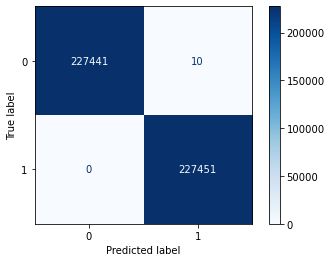

In [ ]:
ConfusionMatrixDisplay.from_estimator(rf_over, X_over, y_over, cmap='Blues');

In [ ]:
display_scores(y_over, y_train_pred)

F1 Score: 100.0% 

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00    227451

    accuracy                           1.00    454902
   macro avg       1.00      1.00      1.00    454902
weighted avg       1.00      1.00      1.00    454902



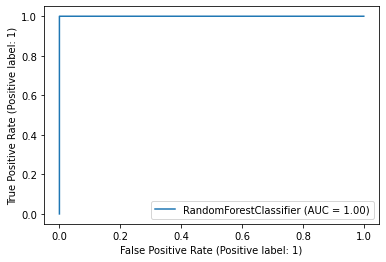

In [ ]:
# Plot the ROC curve
RocCurveDisplay.from_estimator(rf_over, X_over, y_over);

### Evaluating the model on the test set

In [ ]:
# Making prediction on the test set
y_test_pred = rf_over.predict(X_test)

# Predicted probability
y_test_probs = rf_over.predict_proba(X_test)[:,1]


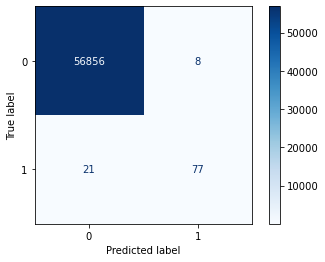

In [ ]:
ConfusionMatrixDisplay.from_estimator(rf_over, X_test, y_test, cmap='Blues')

In [ ]:
display_scores(y_test, y_test_pred)

F1 Score: 84.15% 

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.91      0.79      0.84        98

    accuracy                           1.00     56962
   macro avg       0.95      0.89      0.92     56962
weighted avg       1.00      1.00      1.00     56962



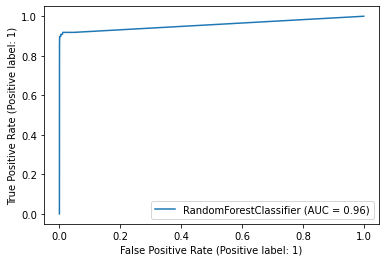

In [ ]:
RocCurveDisplay.from_estimator(rf_over, X_test, y_test);

In [ ]:
summary_results = model_summary('Random Forest - Random Oversampling', summary_results, 
                                y_over, y_train_pred, y_train_probs, y_test, y_test_pred, y_test_probs)

Model Evaluation summary for Random Forest - Random Oversampling

Optimal Threshold: 0.9922

Evaluation metrics on Training data:

Precision: 100.0
Recall: 100.0
F1 Score: 100.0
ROC-AUC score: 1.0

 -----------------------------

Evaluation metrics on Test data: 

Precision: 90.59
Recall: 78.57
F1 Score: 84.15
ROC-AUC score: 0.9571


In [ ]:
summary_results

,Model,Precision,Recall,F1-Score,ROC-AUC,Optimal Threshold
0,Logistic Regression - Imbalanced Data,80.60,55.10,65.45,0.9795,0.0019
1,Decision Tree - Imbalanced Data,69.23,73.47,71.29,0.9414,0.0023
2,Random Forest - Imbalanced Data,91.95,81.63,86.49,0.9764,0.0027
3,XGBoost - Imbalanced Data,86.96,81.63,84.21,0.9768,0.0014
4,Logistic Regression - Random Oversampling,5.84,91.84,10.98,0.9678,0.5333
5,Decision Tree - Random Oversampling,29.78,82.65,43.78,0.9128,0.8983
6,Random Forest - Random Oversampling,90.59,78.57,84.15,0.9571,0.9922


## XGBoost with Random Oversampling

In [ ]:

# hyperparameter space
params = {
    'max_depth': [5, 10, 20],
    'n_estimators': [100,200, 250], 
    'learning_rate': [0.1, 0.2]}     

# Stratified K-Fold Cross-Validation
folds = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# perform cross validation
model_cv = GridSearchCV(estimator=XGBClassifier(subsample=0.8, 
                                                colsample_bytree=0.5,
                                                use_label_encoder=False),
                                  param_grid=params,
                                  scoring='roc_auc',
                                  cv=folds,
                                  n_jobs=-1,
                                  verbose=1,
                                  return_train_score=True)

model_cv.fit(X_over, y_over, eval_metric='logloss')

#print the evaluation result by choosing a evaluation metric
print(f'Best ROC-AUC score: {model_cv.best_score_}')

#print the optimum value of hyperparameters
print(f'Best hyperparameters: {model_cv.best_params_}')

Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best ROC-AUC score: 0.9999950400276164
Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 200}


In [ ]:
# cross validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,62.884020,0.277670,0.211255,0.012637,0.1,5,100,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.999967,0.999955,0.999933,0.999952,0.000014,18,0.999974,0.99997,0.999970,0.999971,1.996169e-06
1,126.807377,0.964167,0.278304,0.088218,0.1,5,200,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.999985,0.999992,0.999987,0.999988,0.000003,17,1.000000,1.00000,0.999999,1.000000,3.603467e-07
2,153.050149,1.991430,0.302597,0.071971,0.1,5,250,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.999987,0.999997,0.999993,0.999992,0.000004,13,1.000000,1.00000,1.000000,1.000000,0.000000e+00
3,131.039961,4.449267,0.295902,0.036327,0.1,10,100,"{'learning_rate': 0.1, 'max_depth': 10, 'n_est...",0.999992,0.999997,0.999987,0.999992,0.000004,14,1.000000,1.00000,1.000000,1.000000,0.000000e+00
4,207.285036,1.149416,0.652616,0.118659,0.1,10,200,"{'learning_rate': 0.1, 'max_depth': 10, 'n_est...",0.999994,0.999997,0.999994,0.999995,0.000001,1,1.000000,1.00000,1.000000,1.000000,0.000000e+00
5,235.263438,0.672653,0.581104,0.036062,0.1,10,250,"{'learning_rate': 0.1, 'max_depth': 10, 'n_est...",0.999993,0.999997,0.999993,0.999995,0.000002,2,1.000000,1.00000,1.000000,1.000000,0.000000e+00
6,166.039503,2.835190,0.376358,0.060026,0.1,20,100,"{'learning_rate': 0.1, 'max_depth': 20, 'n_est...",0.999995,0.999997,0.999982,0.999991,0.000006,15,1.000000,1.00000,1.000000,1.000000,0.000000e+00
7,247.871744,4.368338,0.560432,0.083008,0.1,20,200,"{'learning_rate': 0.1, 'max_depth': 20, 'n_est...",0.999994,0.999998,0.999989,0.999994,0.000003,4,1.000000,1.00000,1.000000,1.000000,0.000000e+00
8,292.593743,6.060667,0.634497,0.051033,0.1,20,250,"{'learning_rate': 0.1, 'max_depth': 20, 'n_est...",0.999994,0.999999,0.999989,0.999994,0.000004,3,1.000000,1.00000,1.000000,1.000000,0.000000e+00
9,58.560188,2.611487,0.202283,0.012923,0.2,5,100,"{'learning_rate': 0.2, 'max_depth': 5, 'n_esti...",0.999985,0.999996,0.999984,0.999989,0.000005,16,1.000000,1.00000,0.999999,1.000000,2.894861e-07


In [ ]:
# Instantiating the model with optimal hyperparameters
xgb_over = model_cv.best_estimator_

# Fitting the model on train dataset
xgb_over.fit(X_over, y_over, eval_metric='logloss')

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=200, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=0.8, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

### Evaluating the model on the train set

In [ ]:
# Predictions on the train set
y_train_pred = xgb_over.predict(X_over)

# Predicted probability
y_train_probs = xgb_over.predict_proba(X_over)[:,1]

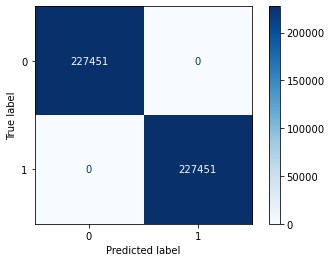

In [ ]:
ConfusionMatrixDisplay.from_estimator(xgb_over, X_over, y_over, cmap='Blues');

In [ ]:
display_scores(y_over, y_train_pred)

F1 Score: 100.0% 

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00    227451

    accuracy                           1.00    454902
   macro avg       1.00      1.00      1.00    454902
weighted avg       1.00      1.00      1.00    454902



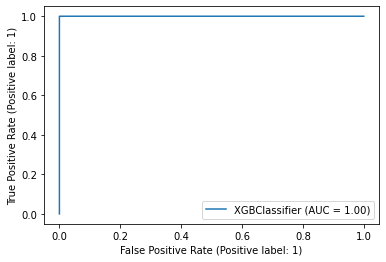

In [ ]:
# Plot the ROC curve
RocCurveDisplay.from_estimator(xgb_over, X_over, y_over);

### Evaluating the model on the test set

In [ ]:
# Making prediction on the test set
y_test_pred = xgb_over.predict(X_test)

# Predicted probability
y_test_probs = xgb_over.predict_proba(X_test)[:,1]


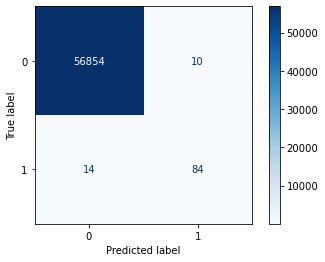

In [ ]:
ConfusionMatrixDisplay.from_estimator(xgb_over, X_test, y_test, cmap='Blues')

In [ ]:
display_scores(y_test, y_test_pred)

F1 Score: 87.5% 

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.89      0.86      0.88        98

    accuracy                           1.00     56962
   macro avg       0.95      0.93      0.94     56962
weighted avg       1.00      1.00      1.00     56962



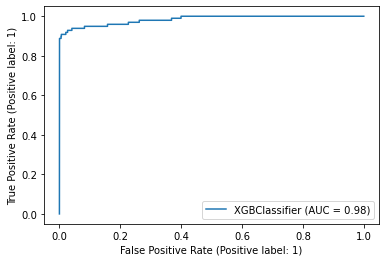

In [ ]:
RocCurveDisplay.from_estimator(xgb_over, X_test, y_test);

In [ ]:
summary_results = model_summary('XGBoost - Random Oversampling', summary_results, 
                                y_over, y_train_pred, y_train_probs, y_test, y_test_pred, y_test_probs)

Model Evaluation summary for XGBoost - Random Oversampling

Optimal Threshold: 0.9995999932289124

Evaluation metrics on Training data:

Precision: 100.0
Recall: 100.0
F1 Score: 100.0
ROC-AUC score: 1.0

 -----------------------------

Evaluation metrics on Test data: 

Precision: 89.36
Recall: 85.71
F1 Score: 87.5
ROC-AUC score: 0.9837


In [ ]:
summary_results

,Model,Precision,Recall,F1-Score,ROC-AUC,Optimal Threshold
0,Logistic Regression - Imbalanced Data,80.60,55.10,65.45,0.9795,0.0019
1,Decision Tree - Imbalanced Data,69.23,73.47,71.29,0.9414,0.0023
2,Random Forest - Imbalanced Data,91.95,81.63,86.49,0.9764,0.0027
3,XGBoost - Imbalanced Data,86.96,81.63,84.21,0.9768,0.0014
4,Logistic Regression - Random Oversampling,5.84,91.84,10.98,0.9678,0.5333
5,Decision Tree - Random Oversampling,29.78,82.65,43.78,0.9128,0.8983
6,Random Forest - Random Oversampling,90.59,78.57,84.15,0.9571,0.9922
7,XGBoost - Random Oversampling,89.36,85.71,87.50,0.9837,0.9996


# SMOTE (Synthetic Minority Oversampling Technique)

### Visualize the class distribution after applying SMOTE 

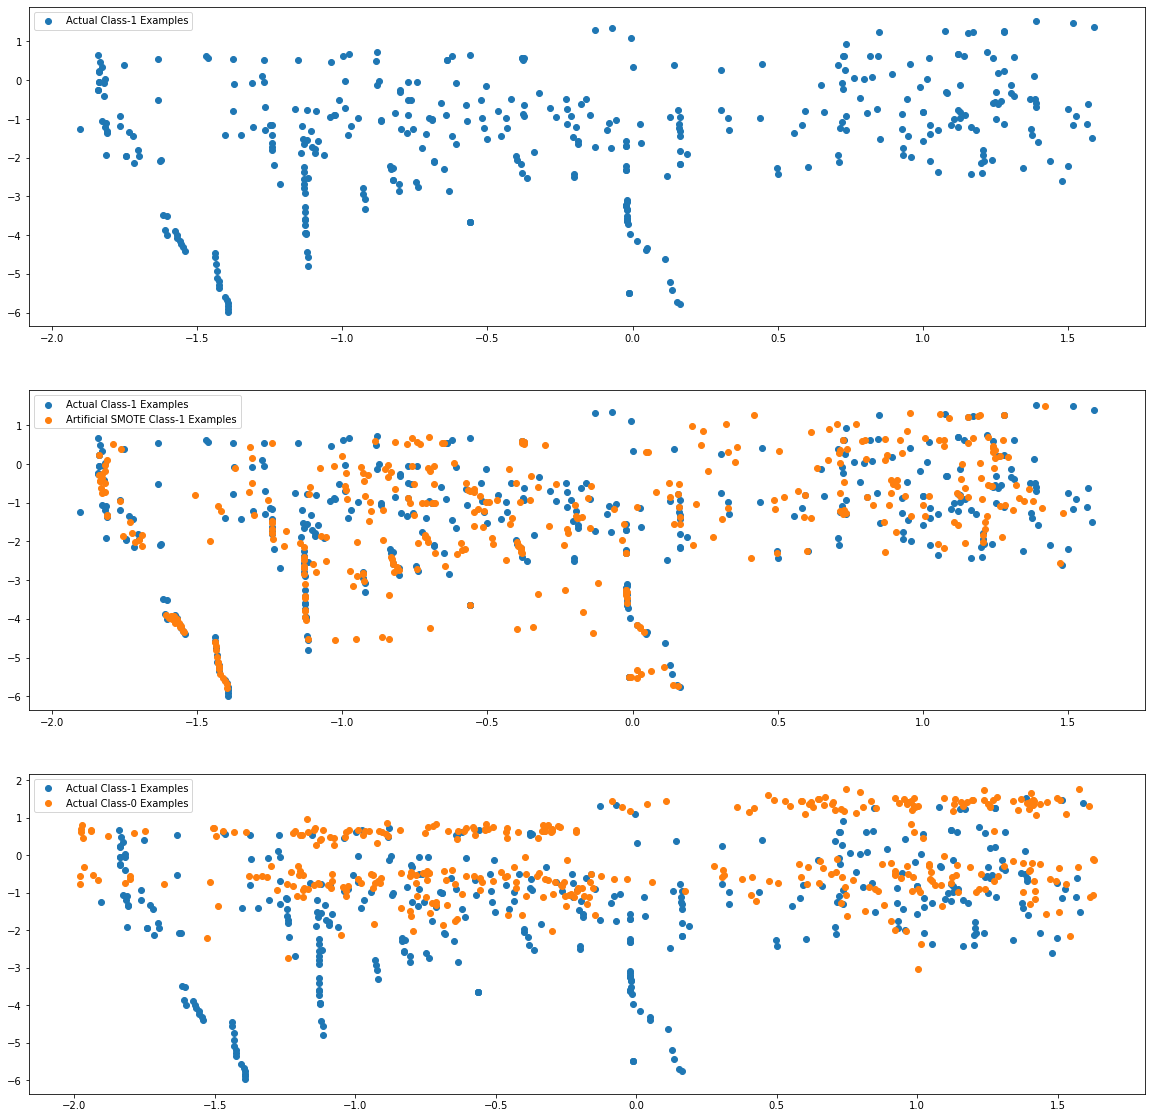

In [ ]:

sm = SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

fig = plt.figure(figsize=(20,20))

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1.iloc[:X_train_1.shape[0], 0], X_train_smote_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

##  Logistic Regression with SMOTE

In [ ]:

# hyperparameter space
params = {
    'C':np.power(10.0,range(-4,4))
}

# Stratified K-Fold Cross-Validation
folds = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# perform cross validation
model_cv = GridSearchCV(estimator=LogisticRegression(),
                                  param_grid=params,
                                  scoring='roc_auc',
                                  cv=folds,
                                  n_jobs=-1,
                                  verbose=1,
                                  return_train_score=True)

# Fit the model
model_cv.fit(X_train_smote, y_train_smote)

#print the evaluation result by choosing a evaluation metric
print(f'Best ROC-AUC score: {model_cv.best_score_}')

#print the optimum value of hyperparameters
print(f'Best hyperparameters: {model_cv.best_params_}')

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best ROC-AUC score: 0.9900079022566711
Best hyperparameters: {'C': 1000.0}


In [ ]:
# cross validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results[['param_C','mean_test_score','mean_train_score']]

,param_C,mean_test_score,mean_train_score
0,0.0001,0.988822,0.988828
1,0.001,0.989494,0.989502
2,0.01,0.989942,0.989951
3,0.1,0.990002,0.990011
4,1.0,0.990007,0.990017
5,10.0,0.990008,0.990017
6,100.0,0.990008,0.990017
7,1000.0,0.990008,0.990017


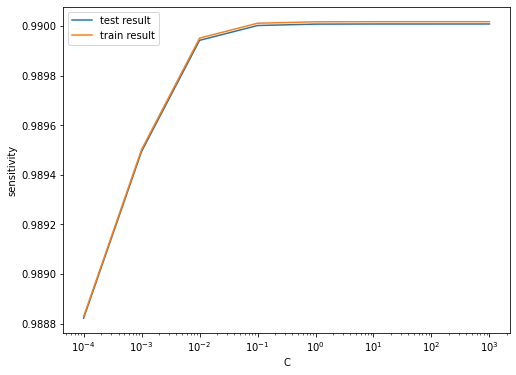

In [ ]:
# plot of C versus train and validation scores
plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='best')
plt.xscale('log')

Logistic regression with optimal C

In [ ]:
# Instantiating the model with best C
log_reg_smote = model_cv.best_estimator_

# Fitting the model on train dataset
log_reg_smote.fit(X_train_smote, y_train_smote)

LogisticRegression(C=1000.0)

### Evaluating the model on the train set

In [ ]:
# Predictions on the train set
y_train_pred = log_reg_smote.predict(X_train_smote)

# Predicted probability
y_train_probs = log_reg_smote.predict_proba(X_train_smote)[:,1]

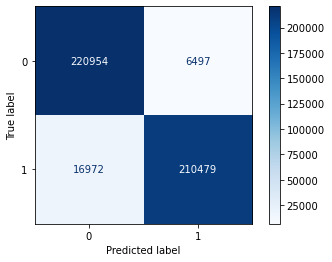

In [ ]:
ConfusionMatrixDisplay.from_estimator(log_reg_smote, X_train_smote, y_train_smote, cmap='Blues');

In [ ]:
display_scores(y_train_smote, y_train_pred)

F1 Score: 94.72% 

Classification Report: 
               precision    recall  f1-score   support

           0       0.93      0.97      0.95    227451
           1       0.97      0.93      0.95    227451

    accuracy                           0.95    454902
   macro avg       0.95      0.95      0.95    454902
weighted avg       0.95      0.95      0.95    454902



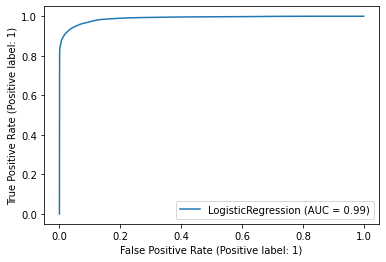

In [ ]:
# Plot the ROC curve
RocCurveDisplay.from_estimator(log_reg_smote, X_train_smote, y_train_smote);

### Evaluating the model on the test set

In [ ]:
# Making prediction on the test set
y_test_pred = log_reg_smote.predict(X_test)

# Predicted probability
y_test_probs = log_reg_smote.predict_proba(X_test)[:,1]


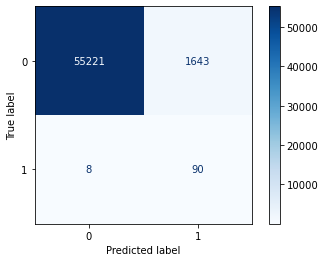

In [ ]:
ConfusionMatrixDisplay.from_estimator(log_reg_smote, X_test, y_test, cmap='Blues')

In [ ]:
display_scores(y_test, y_test_pred)

F1 Score: 9.83% 

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.05      0.92      0.10        98

    accuracy                           0.97     56962
   macro avg       0.53      0.94      0.54     56962
weighted avg       1.00      0.97      0.98     56962



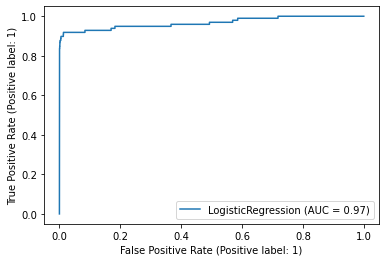

In [ ]:
RocCurveDisplay.from_estimator(log_reg_smote, X_test, y_test);

In [ ]:
summary_results = model_summary('Logistic Regression - SMOTE', summary_results, 
                                y_train_smote, y_train_pred, y_train_probs, y_test, y_test_pred, y_test_probs)

Model Evaluation summary for Logistic Regression - SMOTE

Optimal Threshold: 0.4199

Evaluation metrics on Training data:

Precision: 97.01
Recall: 92.54
F1 Score: 94.72
ROC-AUC score: 0.99

 -----------------------------

Evaluation metrics on Test data: 

Precision: 5.19
Recall: 91.84
F1 Score: 9.83
ROC-AUC score: 0.9671


In [ ]:
summary_results

,Model,Precision,Recall,F1-Score,ROC-AUC,Optimal Threshold
0,Logistic Regression - Imbalanced Data,80.60,55.10,65.45,0.9795,0.0019
1,Decision Tree - Imbalanced Data,69.23,73.47,71.29,0.9414,0.0023
2,Random Forest - Imbalanced Data,91.95,81.63,86.49,0.9764,0.0027
3,XGBoost - Imbalanced Data,86.96,81.63,84.21,0.9768,0.0014
4,Logistic Regression - Random Oversampling,5.84,91.84,10.98,0.9678,0.5333
5,Decision Tree - Random Oversampling,29.78,82.65,43.78,0.9128,0.8983
6,Random Forest - Random Oversampling,90.59,78.57,84.15,0.9571,0.9922
7,XGBoost - Random Oversampling,89.36,85.71,87.50,0.9837,0.9996
8,Logistic Regression - SMOTE,5.19,91.84,9.83,0.9671,0.4199


## Decision Tree with SMOTE

In [ ]:

# hyperparameter space

params = {
    'max_depth': range(5, 16, 5),
    'min_samples_leaf': range(50, 151, 50),
    'min_samples_split': range(50, 151, 50),
}

# Stratified K-Fold Cross-Validation
folds = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# perform cross validation
model_cv = GridSearchCV(estimator=DecisionTreeClassifier(),
                                  param_grid=params,
                                  scoring='roc_auc',
                                  cv=folds,
                                  n_jobs=-1,
                                  verbose=1,
                                  return_train_score=True)

model_cv.fit(X_train_smote, y_train_smote)

#print the evaluation result by choosing a evaluation metric
print(f'Best ROC-AUC score: {model_cv.best_score_}')

#print the optimum value of hyperparameters
print(f'Best hyperparameters: {model_cv.best_params_}')

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best ROC-AUC score: 0.9988290935674905
Best hyperparameters: {'max_depth': 15, 'min_samples_leaf': 50, 'min_samples_split': 150}


In [ ]:
# cross validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results[['param_min_samples_split','param_min_samples_leaf','param_max_depth','mean_test_score','mean_train_score']]

,param_min_samples_split,param_min_samples_leaf,param_max_depth,mean_test_score,mean_train_score
0,50,50,5,0.989461,0.989725
1,100,50,5,0.989464,0.989725
2,150,50,5,0.989462,0.989715
3,50,100,5,0.989501,0.989747
4,100,100,5,0.989501,0.989747
5,150,100,5,0.989501,0.989747
6,50,150,5,0.989515,0.989736
7,100,150,5,0.989509,0.989736
8,150,150,5,0.989511,0.989736
9,50,50,10,0.998501,0.998937


In [ ]:
# Instantiating the model with optimal hyperparameters
dt_smote = model_cv.best_estimator_

# Fitting the model on train dataset
dt_smote.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(max_depth=15, min_samples_leaf=50, min_samples_split=150)

### Evaluating the model on the train set

In [ ]:
# Predictions on the train set
y_train_pred = dt_smote.predict(X_train_smote)

# Predicted probability
y_train_probs = dt_smote.predict_proba(X_train_smote)[:,1]

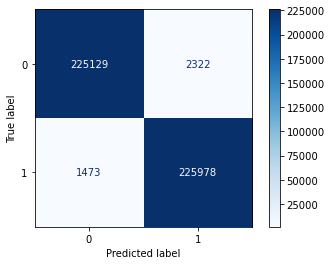

In [ ]:
ConfusionMatrixDisplay.from_estimator(dt_smote, X_train_smote, y_train_smote, cmap='Blues');

In [ ]:
display_scores(y_train_smote, y_train_pred)

F1 Score: 99.17% 

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99    227451
           1       0.99      0.99      0.99    227451

    accuracy                           0.99    454902
   macro avg       0.99      0.99      0.99    454902
weighted avg       0.99      0.99      0.99    454902



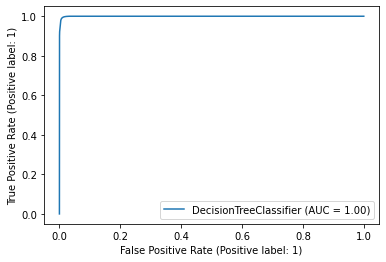

In [ ]:
# Plot the ROC curve
RocCurveDisplay.from_estimator(dt_smote, X_train_smote, y_train_smote);

### Evaluating the model on the test set

In [ ]:
# Making prediction on the test set
y_test_pred = dt_smote.predict(X_test)

# Predicted probability
y_test_probs = dt_smote.predict_proba(X_test)[:,1]


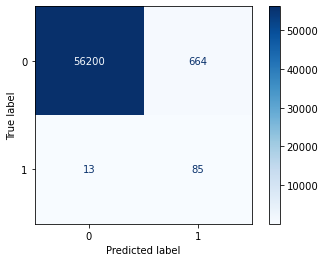

In [ ]:
ConfusionMatrixDisplay.from_estimator(dt_smote, X_test, y_test, cmap='Blues')

In [ ]:
display_scores(y_test, y_test_pred)

F1 Score: 20.07% 

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99     56864
           1       0.11      0.87      0.20        98

    accuracy                           0.99     56962
   macro avg       0.56      0.93      0.60     56962
weighted avg       1.00      0.99      0.99     56962



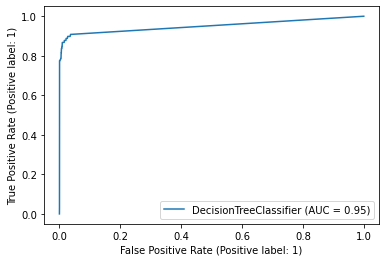

In [ ]:
RocCurveDisplay.from_estimator(dt_smote, X_test, y_test);

In [ ]:
summary_results = model_summary('Decision Tree - SMOTE', summary_results, 
                                y_train_smote, y_train_pred, y_train_probs, y_test, y_test_pred, y_test_probs)

Model Evaluation summary for Decision Tree - SMOTE

Optimal Threshold: 0.5111

Evaluation metrics on Training data:

Precision: 98.98
Recall: 99.35
F1 Score: 99.17
ROC-AUC score: 0.9996

 -----------------------------

Evaluation metrics on Test data: 

Precision: 11.35
Recall: 86.73
F1 Score: 20.07
ROC-AUC score: 0.9505


In [ ]:
summary_results

,Model,Precision,Recall,F1-Score,ROC-AUC,Optimal Threshold
0,Logistic Regression - Imbalanced Data,80.60,55.10,65.45,0.9795,0.0019
1,Decision Tree - Imbalanced Data,69.23,73.47,71.29,0.9414,0.0023
2,Random Forest - Imbalanced Data,91.95,81.63,86.49,0.9764,0.0027
3,XGBoost - Imbalanced Data,86.96,81.63,84.21,0.9768,0.0014
4,Logistic Regression - Random Oversampling,5.84,91.84,10.98,0.9678,0.5333
5,Decision Tree - Random Oversampling,29.78,82.65,43.78,0.9128,0.8983
6,Random Forest - Random Oversampling,90.59,78.57,84.15,0.9571,0.9922
7,XGBoost - Random Oversampling,89.36,85.71,87.50,0.9837,0.9996
8,Logistic Regression - SMOTE,5.19,91.84,9.83,0.9671,0.4199
9,Decision Tree - SMOTE,11.35,86.73,20.07,0.9505,0.5111


## Random Forest with SMOTE

In [ ]:

# hyperparameter space
params = {
    'max_depth': [10,20],
    'min_samples_leaf': [2, 3, 5],
    'n_estimators': [100, 150, 200]
}

# Stratified K-Fold Cross-Validation
folds = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# perform cross validation
model_cv = GridSearchCV(estimator=RandomForestClassifier(),
                                  param_grid=params,
                                  scoring='roc_auc',
                                  cv=folds,
                                  n_jobs=-1,
                                  verbose=1,
                                  return_train_score=True)

model_cv.fit(X_train_smote, y_train_smote)

#print the evaluation result by choosing a evaluation metric
print(f'Best ROC-AUC score: {model_cv.best_score_}')

#print the optimum value of hyperparameters
print(f'Best hyperparameters: {model_cv.best_params_}')

Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best ROC-AUC score: 0.9999963820088507
Best hyperparameters: {'max_depth': 20, 'min_samples_leaf': 2, 'n_estimators': 200}


In [ ]:
# cross validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,184.024154,0.453805,1.398048,0.010435,10,2,100,"{'max_depth': 10, 'min_samples_leaf': 2, 'n_es...",0.999574,0.999591,0.999586,0.999584,7.144788e-06,14,0.999637,0.999662,0.999654,0.999651,1.054042e-05
1,273.297883,0.158004,2.084276,0.032970,10,2,150,"{'max_depth': 10, 'min_samples_leaf': 2, 'n_es...",0.999598,0.999579,0.999499,0.999559,4.291736e-05,17,0.999654,0.999657,0.999586,0.999632,3.320542e-05
2,355.917403,8.322659,2.593050,0.043877,10,2,200,"{'max_depth': 10, 'min_samples_leaf': 2, 'n_es...",0.999620,0.999588,0.999619,0.999609,1.520109e-05,10,0.999686,0.999660,0.999686,0.999677,1.261975e-05
3,175.988860,2.500306,1.359580,0.006889,10,3,100,"{'max_depth': 10, 'min_samples_leaf': 3, 'n_es...",0.999609,0.999543,0.999586,0.999579,2.734974e-05,15,0.999683,0.999620,0.999666,0.999656,2.651082e-05
4,252.034722,3.408951,1.944263,0.016956,10,3,150,"{'max_depth': 10, 'min_samples_leaf': 3, 'n_es...",0.999598,0.999601,0.999622,0.999607,1.063611e-05,11,0.999665,0.999669,0.999694,0.999676,1.297517e-05
5,328.391389,0.217525,2.526273,0.019876,10,3,200,"{'max_depth': 10, 'min_samples_leaf': 3, 'n_es...",0.999593,0.999584,0.999598,0.999592,6.102533e-06,13,0.999655,0.999648,0.999660,0.999655,4.886950e-06
6,162.997121,1.213814,1.297104,0.025900,10,5,100,"{'max_depth': 10, 'min_samples_leaf': 5, 'n_es...",0.999501,0.999576,0.999545,0.999540,3.073827e-05,18,0.999569,0.999639,0.999612,0.999607,2.898823e-05
7,242.315941,0.291468,1.905165,0.011539,10,5,150,"{'max_depth': 10, 'min_samples_leaf': 5, 'n_es...",0.999551,0.999579,0.999568,0.999566,1.126716e-05,16,0.999618,0.999647,0.999648,0.999638,1.372772e-05
8,322.545740,0.274314,2.617803,0.022865,10,5,200,"{'max_depth': 10, 'min_samples_leaf': 5, 'n_es...",0.999578,0.999623,0.999584,0.999595,1.994708e-05,12,0.999644,0.999681,0.999660,0.999662,1.517455e-05
9,221.102498,1.289090,1.716529,0.017934,20,2,100,"{'max_depth': 20, 'min_samples_leaf': 2, 'n_es...",0.999997,0.999996,0.999995,0.999996,7.372380e-07,2,1.000000,1.000000,1.000000,1.000000,1.600880e-09


In [ ]:
# Instantiating the model with optimal hyperparameters
rf_smote = model_cv.best_estimator_

# Fitting the model on train dataset
rf_smote.fit(X_train_smote, y_train_smote)

RandomForestClassifier(max_depth=20, min_samples_leaf=2, n_estimators=200)

### Evaluating the model on the train set

In [ ]:
# Predictions on the train set
y_train_pred = rf_smote.predict(X_train_smote)

# Predicted probability
y_train_probs = rf_smote.predict_proba(X_train_smote)[:,1]

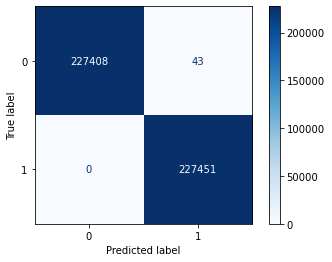

In [ ]:
ConfusionMatrixDisplay.from_estimator(rf_smote, X_train_smote, y_train_smote, cmap='Blues');

In [ ]:
display_scores(y_train_smote, y_train_pred)

F1 Score: 99.99% 

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00    227451

    accuracy                           1.00    454902
   macro avg       1.00      1.00      1.00    454902
weighted avg       1.00      1.00      1.00    454902



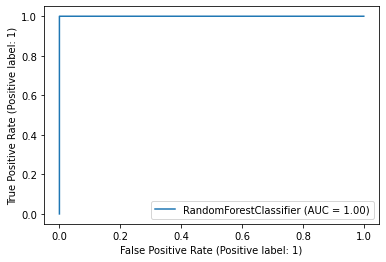

In [ ]:
# Plot the ROC curve
RocCurveDisplay.from_estimator(rf_smote, X_train_smote, y_train_smote);

### Evaluating the model on the test set

In [ ]:
# Making prediction on the test set
y_test_pred = rf_smote.predict(X_test)

# Predicted probability
y_test_probs = rf_smote.predict_proba(X_test)[:,1]


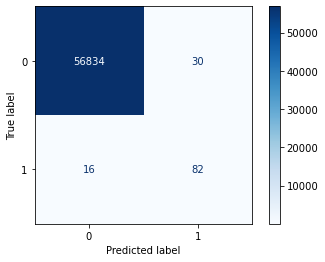

In [ ]:
ConfusionMatrixDisplay.from_estimator(rf_smote, X_test, y_test, cmap='Blues')

In [ ]:
display_scores(y_test, y_test_pred)

F1 Score: 78.1% 

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.73      0.84      0.78        98

    accuracy                           1.00     56962
   macro avg       0.87      0.92      0.89     56962
weighted avg       1.00      1.00      1.00     56962



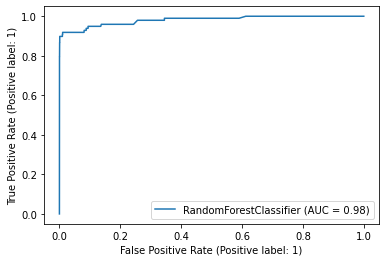

In [ ]:
RocCurveDisplay.from_estimator(rf_smote, X_test, y_test);

In [ ]:
summary_results = model_summary('Random Forest - SMOTE', summary_results, 
                                y_train_smote, y_train_pred, y_train_probs, y_test, y_test_pred, y_test_probs)

Model Evaluation summary for Random Forest - SMOTE

Optimal Threshold: 0.7685

Evaluation metrics on Training data:

Precision: 99.98
Recall: 100.0
F1 Score: 99.99
ROC-AUC score: 1.0

 -----------------------------

Evaluation metrics on Test data: 

Precision: 73.21
Recall: 83.67
F1 Score: 78.1
ROC-AUC score: 0.9809


In [ ]:
summary_results

,Model,Precision,Recall,F1-Score,ROC-AUC,Optimal Threshold
0,Logistic Regression - Imbalanced Data,80.60,55.10,65.45,0.9795,0.0019
1,Decision Tree - Imbalanced Data,69.23,73.47,71.29,0.9414,0.0023
2,Random Forest - Imbalanced Data,91.95,81.63,86.49,0.9764,0.0027
3,XGBoost - Imbalanced Data,86.96,81.63,84.21,0.9768,0.0014
4,Logistic Regression - Random Oversampling,5.84,91.84,10.98,0.9678,0.5333
5,Decision Tree - Random Oversampling,29.78,82.65,43.78,0.9128,0.8983
6,Random Forest - Random Oversampling,90.59,78.57,84.15,0.9571,0.9922
7,XGBoost - Random Oversampling,89.36,85.71,87.50,0.9837,0.9996
8,Logistic Regression - SMOTE,5.19,91.84,9.83,0.9671,0.4199
9,Decision Tree - SMOTE,11.35,86.73,20.07,0.9505,0.5111


## XGBoost with SMOTE

In [ ]:

# hyperparameter space
params = {
    'max_depth': [5, 10, 50],
    'n_estimators': [100,200, 300],
    'learning_rate': [0.1, 0.2]}     

# Stratified K-Fold Cross-Validation
folds = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# perform cross validation
model_cv = GridSearchCV(estimator=XGBClassifier(subsample=0.8, 
                                                colsample_bytree=0.5,
                                                use_label_encoder=False),
                                  param_grid=params,
                                  scoring='roc_auc',
                                  cv=folds,
                                  n_jobs=-1,
                                  verbose=1,
                                  return_train_score=True)

model_cv.fit(X_train_smote, y_train_smote, eval_metric='logloss')

#print the evaluation result by choosing a evaluation metric
print(f'Best ROC-AUC score: {model_cv.best_score_}')

#print the optimum value of hyperparameters
print(f'Best hyperparameters: {model_cv.best_params_}')

Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best ROC-AUC score: 0.9999943930444418
Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 10, 'n_estimators': 300}


In [ ]:
# cross validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,80.898254,0.491088,0.182794,0.014900,0.1,5,100,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.999831,0.999837,0.999800,0.999823,0.000016,18,0.999870,0.999863,0.999854,0.999862,6.752762e-06
1,158.989455,0.877610,0.283804,0.063410,0.1,5,200,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.999966,0.999970,0.999962,0.999966,0.000003,16,0.999991,0.999987,0.999989,0.999989,1.640449e-06
2,229.839589,5.133521,0.358982,0.084699,0.1,5,300,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.999981,0.999989,0.999986,0.999985,0.000004,14,1.000000,1.000000,1.000000,1.000000,1.092358e-07
3,182.952014,3.669463,0.331290,0.051278,0.1,10,100,"{'learning_rate': 0.1, 'max_depth': 10, 'n_est...",0.999984,0.999989,0.999981,0.999985,0.000003,15,1.000000,1.000000,0.999999,1.000000,3.204279e-07
4,302.036359,5.357091,0.598958,0.074014,0.1,10,200,"{'learning_rate': 0.1, 'max_depth': 10, 'n_est...",0.999991,0.999995,0.999993,0.999993,0.000002,6,1.000000,1.000000,1.000000,1.000000,0.000000e+00
5,387.092807,1.984410,0.787159,0.048003,0.1,10,300,"{'learning_rate': 0.1, 'max_depth': 10, 'n_est...",0.999992,0.999996,0.999995,0.999994,0.000002,1,1.000000,1.000000,1.000000,1.000000,0.000000e+00
6,296.273513,3.844075,0.446109,0.045188,0.1,50,100,"{'learning_rate': 0.1, 'max_depth': 50, 'n_est...",0.999988,0.999993,0.999985,0.999989,0.000003,12,1.000000,1.000000,1.000000,1.000000,2.502086e-08
7,438.337157,11.398769,0.897105,0.170643,0.1,50,200,"{'learning_rate': 0.1, 'max_depth': 50, 'n_est...",0.999992,0.999997,0.999990,0.999993,0.000003,7,1.000000,1.000000,1.000000,1.000000,0.000000e+00
8,560.530231,6.405054,1.010548,0.099939,0.1,50,300,"{'learning_rate': 0.1, 'max_depth': 50, 'n_est...",0.999993,0.999997,0.999992,0.999994,0.000002,3,1.000000,1.000000,1.000000,1.000000,0.000000e+00
9,63.601182,3.261225,0.185995,0.016612,0.2,5,100,"{'learning_rate': 0.2, 'max_depth': 5, 'n_esti...",0.999967,0.999964,0.999954,0.999962,0.000006,17,0.999994,0.999988,0.999983,0.999988,4.231189e-06


In [ ]:
# Instantiating the model with optimal hyperparameters
xgb_smote = model_cv.best_estimator_

# Fitting the model on train dataset
xgb_smote.fit(X_train_smote, y_train_smote, eval_metric='logloss')

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=300, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=0.8, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

### Evaluating the model on the train set

In [ ]:
# Predictions on the train set
y_train_pred = xgb_smote.predict(X_train_smote)

# Predicted probability
y_train_probs = xgb_smote.predict_proba(X_train_smote)[:,1]

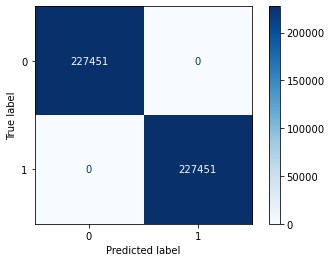

In [ ]:
ConfusionMatrixDisplay.from_estimator(xgb_smote, X_train_smote, y_train_smote, cmap='Blues');

In [ ]:
display_scores(y_train_smote, y_train_pred)

F1 Score: 100.0% 

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00    227451

    accuracy                           1.00    454902
   macro avg       1.00      1.00      1.00    454902
weighted avg       1.00      1.00      1.00    454902



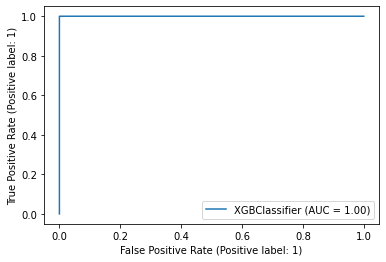

In [ ]:
# Plot the ROC curve
RocCurveDisplay.from_estimator(xgb_smote, X_train_smote, y_train_smote);

### Evaluating the model on the test set

In [ ]:
# Making prediction on the test set
y_test_pred = xgb_smote.predict(X_test)

# Predicted probability
y_test_probs = xgb_smote.predict_proba(X_test)[:,1]


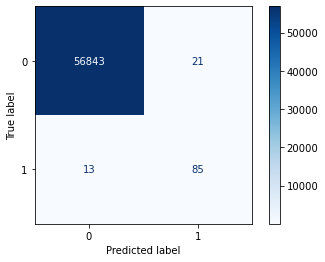

In [ ]:
ConfusionMatrixDisplay.from_estimator(xgb_smote, X_test, y_test, cmap='Blues')

In [ ]:
display_scores(y_test, y_test_pred)

F1 Score: 83.33% 

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.80      0.87      0.83        98

    accuracy                           1.00     56962
   macro avg       0.90      0.93      0.92     56962
weighted avg       1.00      1.00      1.00     56962



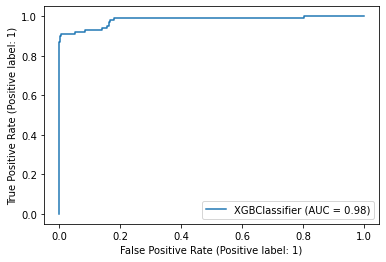

In [ ]:
RocCurveDisplay.from_estimator(xgb_smote, X_test, y_test);

In [ ]:
summary_results = model_summary('XGBoost - SMOTE', summary_results, 
                                y_train_smote, y_train_pred, y_train_probs, y_test, y_test_pred, y_test_probs)

Model Evaluation summary for XGBoost - SMOTE

Optimal Threshold: 0.9484999775886536

Evaluation metrics on Training data:

Precision: 100.0
Recall: 100.0
F1 Score: 100.0
ROC-AUC score: 1.0

 -----------------------------

Evaluation metrics on Test data: 

Precision: 80.19
Recall: 86.73
F1 Score: 83.33
ROC-AUC score: 0.9805


In [ ]:
summary_results

,Model,Precision,Recall,F1-Score,ROC-AUC,Optimal Threshold
0,Logistic Regression - Imbalanced Data,80.60,55.10,65.45,0.9795,0.0019
1,Decision Tree - Imbalanced Data,69.23,73.47,71.29,0.9414,0.0023
2,Random Forest - Imbalanced Data,91.95,81.63,86.49,0.9764,0.0027
3,XGBoost - Imbalanced Data,86.96,81.63,84.21,0.9768,0.0014
4,Logistic Regression - Random Oversampling,5.84,91.84,10.98,0.9678,0.5333
5,Decision Tree - Random Oversampling,29.78,82.65,43.78,0.9128,0.8983
6,Random Forest - Random Oversampling,90.59,78.57,84.15,0.9571,0.9922
7,XGBoost - Random Oversampling,89.36,85.71,87.50,0.9837,0.9996
8,Logistic Regression - SMOTE,5.19,91.84,9.83,0.9671,0.4199
9,Decision Tree - SMOTE,11.35,86.73,20.07,0.9505,0.5111


# ADASYN (Adaptive Synthetic Sampling)

### Visualize the class distribution after applying ADASYN

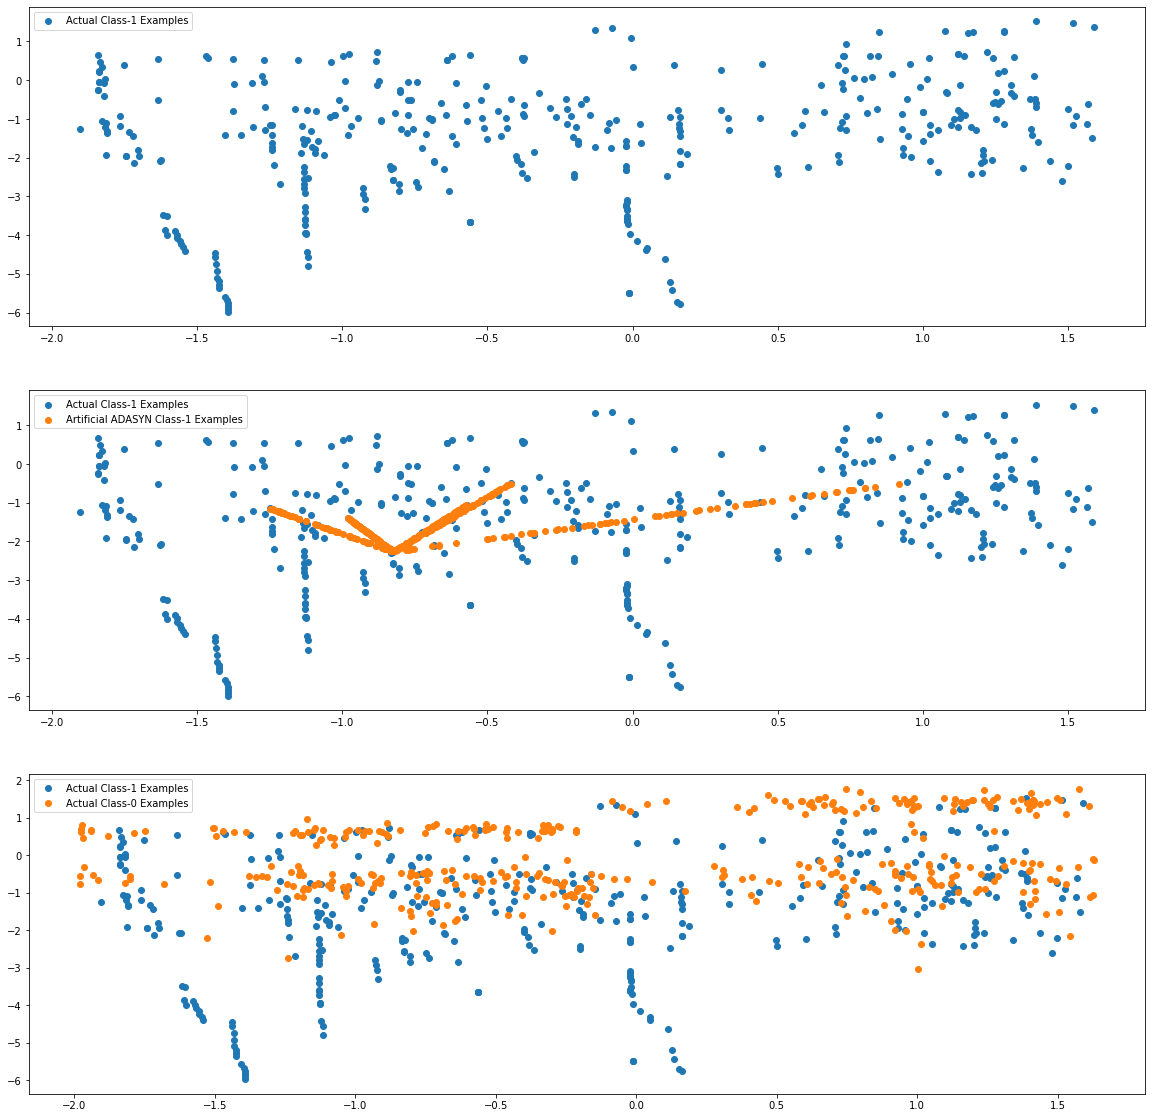

In [ ]:
from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]



fig = plt.figure(figsize=(20,20))

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1.iloc[:X_train_1.shape[0], 0], X_train_adasyn_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

## Logistic Regression with ADASYN

In [ ]:

# hyperparameter space
params = {
    'C':np.power(10.0,range(-4,4))
}

# Stratified K-Fold Cross-Validation
folds = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# perform cross validation
model_cv = GridSearchCV(estimator=LogisticRegression(),
                                  param_grid=params,
                                  scoring='roc_auc',
                                  cv=folds,
                                  n_jobs=-1,
                                  verbose=1,
                                  return_train_score=True)

# Fit the model
model_cv.fit(X_train_adasyn, y_train_adasyn)

#print the evaluation result by choosing a evaluation metric
print(f'Best ROC-AUC score: {model_cv.best_score_}')

#print the optimum value of hyperparameters
print(f'Best hyperparameters: {model_cv.best_params_}')

Fitting 3 folds for each of 8 candidates, totalling 24 fits
Best ROC-AUC score: 0.9626950497230901
Best hyperparameters: {'C': 10.0}


In [ ]:
# cross validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results[['param_C','mean_test_score','mean_train_score']]

,param_C,mean_test_score,mean_train_score
0,0.0001,0.957251,0.957269
1,0.001,0.961260,0.961281
2,0.01,0.962571,0.962596
3,0.1,0.962685,0.962710
4,1.0,0.962694,0.962719
5,10.0,0.962695,0.962720
6,100.0,0.962695,0.962720
7,1000.0,0.962695,0.962720


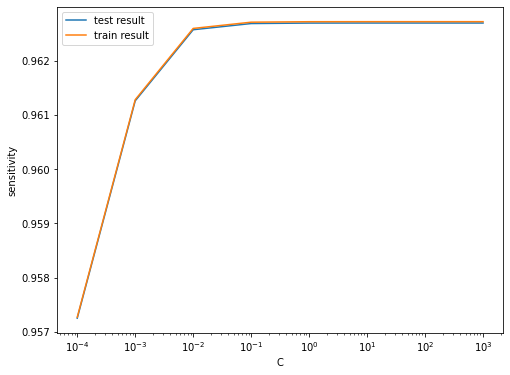

In [ ]:
# plot of C versus train and validation scores
plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='best')
plt.xscale('log')

Logistic regression with optimal C

In [ ]:
# Instantiating the model with best C
log_reg_adasyn = model_cv.best_estimator_

# Fitting the model on train dataset
log_reg_adasyn.fit(X_train_adasyn, y_train_adasyn)

LogisticRegression(C=10.0)

### Evaluating the model on the train set

In [ ]:
# Predictions on the train set
y_train_pred = log_reg_adasyn.predict(X_train_adasyn)

# Predicted probability
y_train_probs = log_reg_adasyn.predict_proba(X_train_adasyn)[:,1]

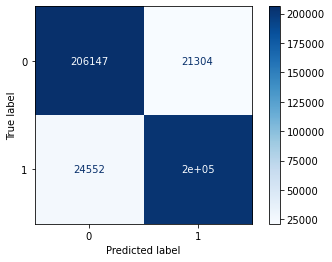

In [ ]:
ConfusionMatrixDisplay.from_estimator(log_reg_adasyn, X_train_adasyn, y_train_adasyn, cmap='Blues');

In [ ]:
display_scores(y_train_adasyn, y_train_pred)

F1 Score: 89.85% 

Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.91      0.90    227451
           1       0.90      0.89      0.90    227470

    accuracy                           0.90    454921
   macro avg       0.90      0.90      0.90    454921
weighted avg       0.90      0.90      0.90    454921



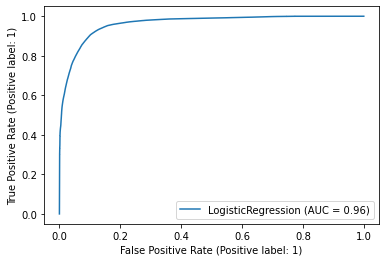

In [ ]:
# Plot the ROC curve
RocCurveDisplay.from_estimator(log_reg_adasyn, X_train_adasyn, y_train_adasyn);

### Evaluating the model on the test set

In [ ]:
# Making prediction on the test set
y_test_pred = log_reg_adasyn.predict(X_test)

# Predicted probability
y_test_probs = log_reg_adasyn.predict_proba(X_test)[:,1]


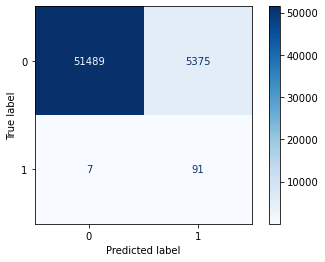

In [ ]:
ConfusionMatrixDisplay.from_estimator(log_reg_adasyn, X_test, y_test, cmap='Blues')

In [ ]:
display_scores(y_test, y_test_pred)

F1 Score: 3.27% 

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.91      0.95     56864
           1       0.02      0.93      0.03        98

    accuracy                           0.91     56962
   macro avg       0.51      0.92      0.49     56962
weighted avg       1.00      0.91      0.95     56962



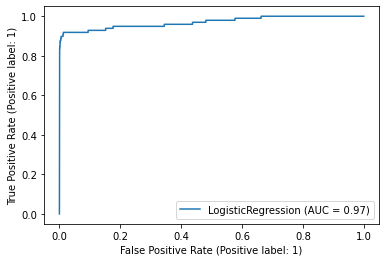

In [ ]:
RocCurveDisplay.from_estimator(log_reg_adasyn, X_test, y_test);

In [ ]:
summary_results = model_summary('Logistic Regression - Adasyn', summary_results, 
                                y_train_adasyn, y_train_pred, y_train_probs, y_test, y_test_pred, y_test_probs)

Model Evaluation summary for Logistic Regression - Adasyn

Optimal Threshold: 0.429

Evaluation metrics on Training data:

Precision: 90.5
Recall: 89.21
F1 Score: 89.85
ROC-AUC score: 0.9627

 -----------------------------

Evaluation metrics on Test data: 

Precision: 1.66
Recall: 92.86
F1 Score: 3.27
ROC-AUC score: 0.9696


In [ ]:
summary_results

,Model,Precision,Recall,F1-Score,ROC-AUC,Optimal Threshold
0,Logistic Regression - Imbalanced Data,80.60,55.10,65.45,0.9795,0.0019
1,Decision Tree - Imbalanced Data,69.23,73.47,71.29,0.9414,0.0023
2,Random Forest - Imbalanced Data,91.95,81.63,86.49,0.9764,0.0027
3,XGBoost - Imbalanced Data,86.96,81.63,84.21,0.9768,0.0014
4,Logistic Regression - Random Oversampling,5.84,91.84,10.98,0.9678,0.5333
5,Decision Tree - Random Oversampling,29.78,82.65,43.78,0.9128,0.8983
6,Random Forest - Random Oversampling,90.59,78.57,84.15,0.9571,0.9922
7,XGBoost - Random Oversampling,89.36,85.71,87.50,0.9837,0.9996
8,Logistic Regression - SMOTE,5.19,91.84,9.83,0.9671,0.4199
9,Decision Tree - SMOTE,11.35,86.73,20.07,0.9505,0.5111


## Decision tree with ADASYN

In [ ]:

# hyperparameter space

params = {
    'max_depth': range(5, 16, 5),
    'min_samples_leaf': range(50, 151, 50),
    'min_samples_split': range(50, 151, 50),
}

# Stratified K-Fold Cross-Validation
folds = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# perform cross validation
model_cv = GridSearchCV(estimator=DecisionTreeClassifier(),
                                  param_grid=params,
                                  scoring='roc_auc',
                                  cv=folds,
                                  n_jobs=-1,
                                  verbose=1,
                                  return_train_score=True)

model_cv.fit(X_train_adasyn, y_train_adasyn)

#print the evaluation result by choosing a evaluation metric
print(f'Best ROC-AUC score: {model_cv.best_score_}')

#print the optimum value of hyperparameters
print(f'Best hyperparameters: {model_cv.best_params_}')

Fitting 3 folds for each of 27 candidates, totalling 81 fits
Best ROC-AUC score: 0.9966908753413607
Best hyperparameters: {'max_depth': 15, 'min_samples_leaf': 100, 'min_samples_split': 50}


In [ ]:
# cross validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results[['param_min_samples_split','param_min_samples_leaf','param_max_depth','mean_test_score','mean_train_score']]

,param_min_samples_split,param_min_samples_leaf,param_max_depth,mean_test_score,mean_train_score
0,50,50,5,0.961486,0.962133
1,100,50,5,0.961490,0.962133
2,150,50,5,0.961494,0.962133
3,50,100,5,0.961383,0.962025
4,100,100,5,0.961383,0.962025
5,150,100,5,0.961383,0.962025
6,50,150,5,0.961349,0.961956
7,100,150,5,0.961349,0.961956
8,150,150,5,0.961349,0.961956
9,50,50,10,0.992101,0.992631


In [ ]:
# Instantiating the model with optimal hyperparameters
dt_adasyn = model_cv.best_estimator_

# Fitting the model on train dataset
dt_adasyn.fit(X_train_adasyn, y_train_adasyn)

DecisionTreeClassifier(max_depth=15, min_samples_leaf=100, min_samples_split=50)

### Evaluating the model on the train set

In [ ]:
# Predictions on the train set
y_train_pred = dt_adasyn.predict(X_train_adasyn)

# Predicted probability
y_train_probs = dt_adasyn.predict_proba(X_train_adasyn)[:,1]

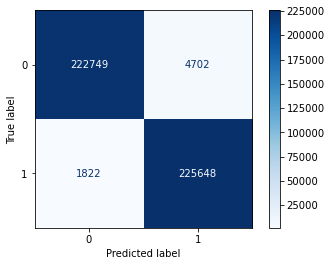

In [ ]:
ConfusionMatrixDisplay.from_estimator(dt_adasyn, X_train_adasyn, y_train_adasyn, cmap='Blues');

In [ ]:
display_scores(y_train_adasyn, y_train_pred)

F1 Score: 98.57% 

Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.98      0.99    227451
           1       0.98      0.99      0.99    227470

    accuracy                           0.99    454921
   macro avg       0.99      0.99      0.99    454921
weighted avg       0.99      0.99      0.99    454921



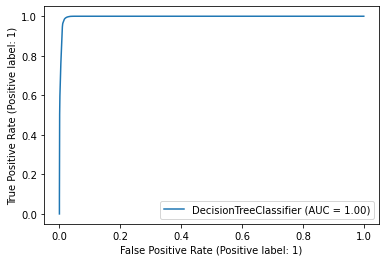

In [ ]:
# Plot the ROC curve
RocCurveDisplay.from_estimator(dt_adasyn, X_train_adasyn, y_train_adasyn);

### Evaluating the model on the test set

In [ ]:
# Making prediction on the test set
y_test_pred = dt_adasyn.predict(X_test)

# Predicted probability
y_test_probs = dt_adasyn.predict_proba(X_test)[:,1]


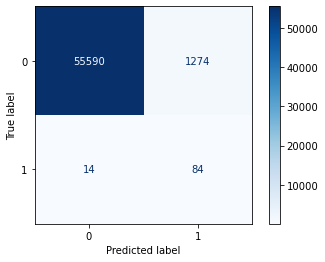

In [ ]:
ConfusionMatrixDisplay.from_estimator(dt_adasyn, X_test, y_test, cmap='Blues')

In [ ]:
display_scores(y_test, y_test_pred)

F1 Score: 11.54% 

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.86      0.12        98

    accuracy                           0.98     56962
   macro avg       0.53      0.92      0.55     56962
weighted avg       1.00      0.98      0.99     56962



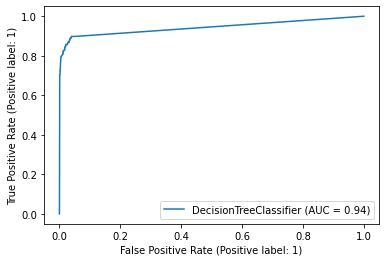

In [ ]:
RocCurveDisplay.from_estimator(dt_adasyn, X_test, y_test);

In [ ]:
summary_results = model_summary('Decision Tree - Adasyn', summary_results, 
                                y_train_adasyn, y_train_pred, y_train_probs, y_test, y_test_pred, y_test_probs)

Model Evaluation summary for Decision Tree - Adasyn

Optimal Threshold: 0.51

Evaluation metrics on Training data:

Precision: 97.96
Recall: 99.2
F1 Score: 98.57
ROC-AUC score: 0.9971

 -----------------------------

Evaluation metrics on Test data: 

Precision: 6.19
Recall: 85.71
F1 Score: 11.54
ROC-AUC score: 0.9434


In [ ]:
summary_results

,Model,Precision,Recall,F1-Score,ROC-AUC,Optimal Threshold
0,Logistic Regression - Imbalanced Data,80.60,55.10,65.45,0.9795,0.0019
1,Decision Tree - Imbalanced Data,69.23,73.47,71.29,0.9414,0.0023
2,Random Forest - Imbalanced Data,91.95,81.63,86.49,0.9764,0.0027
3,XGBoost - Imbalanced Data,86.96,81.63,84.21,0.9768,0.0014
4,Logistic Regression - Random Oversampling,5.84,91.84,10.98,0.9678,0.5333
5,Decision Tree - Random Oversampling,29.78,82.65,43.78,0.9128,0.8983
6,Random Forest - Random Oversampling,90.59,78.57,84.15,0.9571,0.9922
7,XGBoost - Random Oversampling,89.36,85.71,87.50,0.9837,0.9996
8,Logistic Regression - SMOTE,5.19,91.84,9.83,0.9671,0.4199
9,Decision Tree - SMOTE,11.35,86.73,20.07,0.9505,0.5111


## Random Forest with ADASYN

In [ ]:

# hyperparameter space
params = {
    'max_depth': [10,20],
    'min_samples_leaf': [2, 3, 5],
    'n_estimators': [100, 150, 200]
}

# Stratified K-Fold Cross-Validation
folds = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# perform cross validation
model_cv = GridSearchCV(estimator=RandomForestClassifier(),
                                  param_grid=params,
                                  scoring='roc_auc',
                                  cv=folds,
                                  n_jobs=-1,
                                  verbose=1,
                                  return_train_score=True)

model_cv.fit(X_train_adasyn, y_train_adasyn)

#print the evaluation result by choosing a evaluation metric
print(f'Best ROC-AUC score: {model_cv.best_score_}')

#print the optimum value of hyperparameters
print(f'Best hyperparameters: {model_cv.best_params_}')

Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best ROC-AUC score: 0.9999990491172167
Best hyperparameters: {'max_depth': 20, 'min_samples_leaf': 2, 'n_estimators': 100}


In [ ]:
# cross validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,149.892278,0.367872,1.302514,0.020659,10,2,100,"{'max_depth': 10, 'min_samples_leaf': 2, 'n_es...",0.999548,0.999525,0.999527,0.999533,1.068026e-05,18,0.999590,0.999581,0.999625,0.999599,1.911020e-05
1,226.831711,0.155101,1.932370,0.014044,10,2,150,"{'max_depth': 10, 'min_samples_leaf': 2, 'n_es...",0.999542,0.999576,0.999562,0.999560,1.397541e-05,14,0.999593,0.999631,0.999647,0.999624,2.255826e-05
2,304.378701,2.339845,2.540196,0.020413,10,2,200,"{'max_depth': 10, 'min_samples_leaf': 2, 'n_es...",0.999588,0.999570,0.999509,0.999556,3.371490e-05,16,0.999625,0.999616,0.999610,0.999617,6.180196e-06
3,152.911548,0.254335,1.316431,0.010959,10,3,100,"{'max_depth': 10, 'min_samples_leaf': 3, 'n_es...",0.999582,0.999571,0.999568,0.999574,5.838028e-06,10,0.999611,0.999616,0.999670,0.999632,2.701329e-05
4,230.034562,0.289124,1.954781,0.012231,10,3,150,"{'max_depth': 10, 'min_samples_leaf': 3, 'n_es...",0.999570,0.999598,0.999506,0.999558,3.868008e-05,15,0.999595,0.999641,0.999619,0.999618,1.907876e-05
5,310.317795,0.822582,2.815135,0.120467,10,3,200,"{'max_depth': 10, 'min_samples_leaf': 3, 'n_es...",0.999588,0.999550,0.999515,0.999551,2.969316e-05,17,0.999628,0.999598,0.999610,0.999612,1.241682e-05
6,155.786247,1.665694,1.476457,0.086576,10,5,100,"{'max_depth': 10, 'min_samples_leaf': 5, 'n_es...",0.999580,0.999557,0.999554,0.999564,1.160265e-05,13,0.999613,0.999613,0.999642,0.999622,1.362879e-05
7,242.318143,1.171171,1.981997,0.105832,10,5,150,"{'max_depth': 10, 'min_samples_leaf': 5, 'n_es...",0.999606,0.999592,0.999520,0.999573,3.755081e-05,11,0.999623,0.999629,0.999625,0.999626,2.509631e-06
8,313.729961,0.306171,2.545896,0.008873,10,5,200,"{'max_depth': 10, 'min_samples_leaf': 5, 'n_es...",0.999584,0.999602,0.999512,0.999566,3.879516e-05,12,0.999607,0.999644,0.999613,0.999621,1.584316e-05
9,219.206360,2.972919,1.603752,0.013629,20,2,100,"{'max_depth': 20, 'min_samples_leaf': 2, 'n_es...",0.999999,0.999999,0.999999,0.999999,2.755820e-07,1,1.000000,1.000000,1.000000,1.000000,7.515513e-10


In [ ]:
# Instantiating the model with optimal hyperparameters
rf_adasyn = model_cv.best_estimator_

# Fitting the model on train dataset
rf_adasyn.fit(X_train_adasyn, y_train_adasyn)

RandomForestClassifier(max_depth=20, min_samples_leaf=2)

### Evaluating the model on the train set

In [ ]:
# Predictions on the train set
y_train_pred = rf_adasyn.predict(X_train_adasyn)

# Predicted probability
y_train_probs = rf_adasyn.predict_proba(X_train_adasyn)[:,1]

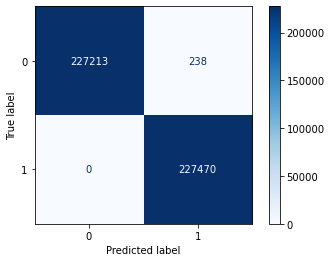

In [ ]:
ConfusionMatrixDisplay.from_estimator(rf_adasyn, X_train_adasyn, y_train_adasyn, cmap='Blues');

In [ ]:
display_scores(y_train_adasyn, y_train_pred)

F1 Score: 99.95% 

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00    227470

    accuracy                           1.00    454921
   macro avg       1.00      1.00      1.00    454921
weighted avg       1.00      1.00      1.00    454921



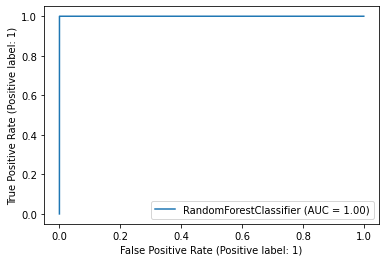

In [ ]:
# Plot the ROC curve
RocCurveDisplay.from_estimator(rf_adasyn, X_train_adasyn, y_train_adasyn);

### Evaluating the model on the test set

In [ ]:
# Making prediction on the test set
y_test_pred = rf_adasyn.predict(X_test)

# Predicted probability
y_test_probs = rf_adasyn.predict_proba(X_test)[:,1]


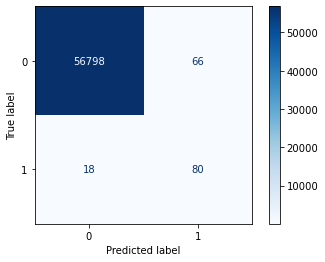

In [ ]:
ConfusionMatrixDisplay.from_estimator(rf_adasyn, X_test, y_test, cmap='Blues')

In [ ]:
display_scores(y_test, y_test_pred)

F1 Score: 65.57% 

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.55      0.82      0.66        98

    accuracy                           1.00     56962
   macro avg       0.77      0.91      0.83     56962
weighted avg       1.00      1.00      1.00     56962



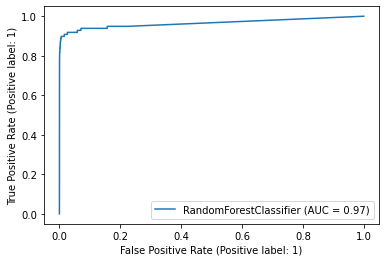

In [ ]:
RocCurveDisplay.from_estimator(rf_adasyn, X_test, y_test);

In [ ]:
summary_results = model_summary('Random Forest - Adasyn', summary_results, 
                                y_train_adasyn, y_train_pred, y_train_probs, y_test, y_test_pred, y_test_probs)

Model Evaluation summary for Random Forest - Adasyn

Optimal Threshold: 0.8464

Evaluation metrics on Training data:

Precision: 99.9
Recall: 100.0
F1 Score: 99.95
ROC-AUC score: 1.0

 -----------------------------

Evaluation metrics on Test data: 

Precision: 54.79
Recall: 81.63
F1 Score: 65.57
ROC-AUC score: 0.9651


In [ ]:
summary_results

,Model,Precision,Recall,F1-Score,ROC-AUC,Optimal Threshold
0,Logistic Regression - Imbalanced Data,80.60,55.10,65.45,0.9795,0.0019
1,Decision Tree - Imbalanced Data,69.23,73.47,71.29,0.9414,0.0023
2,Random Forest - Imbalanced Data,91.95,81.63,86.49,0.9764,0.0027
3,XGBoost - Imbalanced Data,86.96,81.63,84.21,0.9768,0.0014
4,Logistic Regression - Random Oversampling,5.84,91.84,10.98,0.9678,0.5333
5,Decision Tree - Random Oversampling,29.78,82.65,43.78,0.9128,0.8983
6,Random Forest - Random Oversampling,90.59,78.57,84.15,0.9571,0.9922
7,XGBoost - Random Oversampling,89.36,85.71,87.50,0.9837,0.9996
8,Logistic Regression - SMOTE,5.19,91.84,9.83,0.9671,0.4199
9,Decision Tree - SMOTE,11.35,86.73,20.07,0.9505,0.5111


## XGBoost with ADASYN

In [ ]:

# hyperparameter space
params = {
    'max_depth': [5,10, 50],
    'n_estimators': [100,200,300],
    'learning_rate': [0.1,0.2], 
    }     

# Stratified K-Fold Cross-Validation
folds = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

# perform cross validation
model_cv = GridSearchCV(estimator=XGBClassifier(subsample=0.8, 
                                                colsample_bytree=0.5,
                                                use_label_encoder=False),
                                  param_grid=params,
                                  scoring='roc_auc',
                                  cv=folds,
                                  n_jobs=-1,
                                  verbose=1,
                                  return_train_score=True)

model_cv.fit(X_train_adasyn, y_train_adasyn, eval_metric='logloss')

#print the evaluation result by choosing a evaluation metric
print(f'Best ROC-AUC score: {model_cv.best_score_}')

#print the optimum value of hyperparameters
print(f'Best hyperparameters: {model_cv.best_params_}')

Fitting 3 folds for each of 18 candidates, totalling 54 fits
Best ROC-AUC score: 0.9999943558965899
Best hyperparameters: {'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 300}


In [ ]:
# cross validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,83.713512,0.466395,0.257151,0.053227,0.1,5,100,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.999546,0.999531,0.999454,0.999510,4.046197e-05,18,0.999640,0.999552,0.999564,0.999585,3.862653e-05
1,174.049560,1.243012,0.399198,0.034685,0.1,5,200,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.999919,0.999926,0.999919,0.999921,3.433476e-06,16,0.999978,0.999969,0.999977,0.999975,3.918273e-06
2,253.674489,0.375307,0.391162,0.076399,0.1,5,300,"{'learning_rate': 0.1, 'max_depth': 5, 'n_esti...",0.999966,0.999978,0.999973,0.999973,4.855808e-06,15,1.000000,1.000000,1.000000,1.000000,3.455488e-08
3,210.475429,6.637200,0.544243,0.161653,0.1,10,100,"{'learning_rate': 0.1, 'max_depth': 10, 'n_est...",0.999969,0.999983,0.999968,0.999973,6.952218e-06,14,1.000000,1.000000,1.000000,1.000000,9.647437e-09
4,347.304757,3.822358,0.657509,0.074074,0.1,10,200,"{'learning_rate': 0.1, 'max_depth': 10, 'n_est...",0.999987,0.999989,0.999998,0.999991,4.477464e-06,9,1.000000,1.000000,1.000000,1.000000,0.000000e+00
5,454.233657,0.568030,1.082447,0.097547,0.1,10,300,"{'learning_rate': 0.1, 'max_depth': 10, 'n_est...",0.999990,0.999991,0.999999,0.999993,3.803647e-06,7,1.000000,1.000000,1.000000,1.000000,0.000000e+00
6,382.711718,3.850816,0.551145,0.043009,0.1,50,100,"{'learning_rate': 0.1, 'max_depth': 50, 'n_est...",0.999993,0.999993,0.999987,0.999991,3.060300e-06,11,1.000000,1.000000,1.000000,1.000000,1.230027e-10
7,551.992451,18.540471,1.070226,0.204494,0.1,50,200,"{'learning_rate': 0.1, 'max_depth': 50, 'n_est...",0.999994,0.999993,0.999994,0.999994,7.066022e-07,5,1.000000,1.000000,1.000000,1.000000,0.000000e+00
8,696.892269,6.667778,1.298650,0.088863,0.1,50,300,"{'learning_rate': 0.1, 'max_depth': 50, 'n_est...",0.999994,0.999994,0.999995,0.999994,3.936172e-07,2,1.000000,1.000000,1.000000,1.000000,0.000000e+00
9,73.510658,4.689983,0.220507,0.007974,0.2,5,100,"{'learning_rate': 0.2, 'max_depth': 5, 'n_esti...",0.999916,0.999923,0.999914,0.999918,3.926898e-06,17,0.999985,0.999969,0.999973,0.999976,6.665479e-06


In [ ]:
# Instantiating the model with optimal hyperparameters
xgb_adasyn = model_cv.best_estimator_

# Fitting the model on train dataset
xgb_adasyn.fit(X_train_adasyn, y_train_adasyn, eval_metric='logloss')

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5,
              enable_categorical=False, gamma=0, gpu_id=-1,
              importance_type=None, interaction_constraints='',
              learning_rate=0.2, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=300, n_jobs=8, num_parallel_tree=1, predictor='auto',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=0.8, tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

### Evaluating the model on the train set

In [ ]:
# Predictions on the train set
y_train_pred = xgb_adasyn.predict(X_train_adasyn)

# Predicted probability
y_train_probs = xgb_adasyn.predict_proba(X_train_adasyn)[:,1]

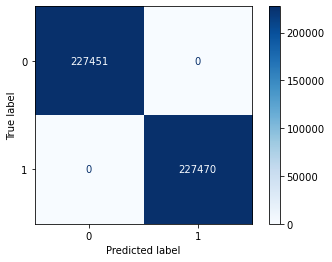

In [ ]:
ConfusionMatrixDisplay.from_estimator(xgb_adasyn, X_train_adasyn, y_train_adasyn, cmap='Blues');

In [ ]:
display_scores(y_train_adasyn, y_train_pred)

F1 Score: 100.0% 

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00    227470

    accuracy                           1.00    454921
   macro avg       1.00      1.00      1.00    454921
weighted avg       1.00      1.00      1.00    454921



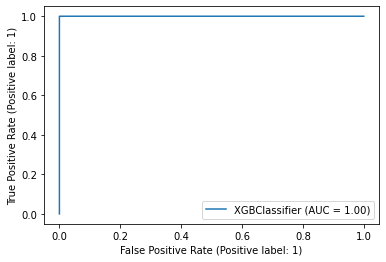

In [ ]:
# Plot the ROC curve
RocCurveDisplay.from_estimator(xgb_adasyn, X_train_adasyn, y_train_adasyn);

### Evaluating the model on the test set

In [ ]:
# Making prediction on the test set
y_test_pred = xgb_adasyn.predict(X_test)

# Predicted probability
y_test_probs = xgb_adasyn.predict_proba(X_test)[:,1]


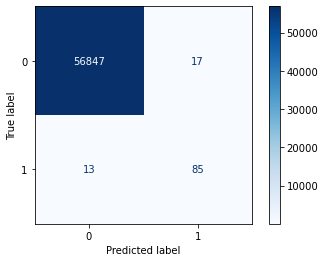

In [ ]:
ConfusionMatrixDisplay.from_estimator(xgb_adasyn, X_test, y_test, cmap='Blues')

In [ ]:
display_scores(y_test, y_test_pred)

F1 Score: 85.0% 

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.83      0.87      0.85        98

    accuracy                           1.00     56962
   macro avg       0.92      0.93      0.92     56962
weighted avg       1.00      1.00      1.00     56962



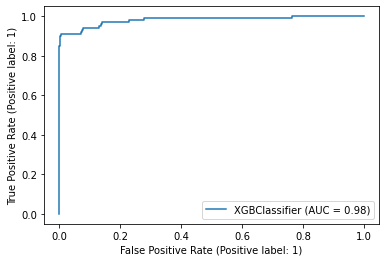

In [ ]:
RocCurveDisplay.from_estimator(xgb_adasyn, X_test, y_test);

In [ ]:
summary_results = model_summary('XGBoost - Adasyn', summary_results, 
                                y_train_adasyn, y_train_pred, y_train_probs, y_test, y_test_pred, y_test_probs)

Model Evaluation summary for XGBoost - Adasyn

Optimal Threshold: 0.9775000214576721

Evaluation metrics on Training data:

Precision: 100.0
Recall: 100.0
F1 Score: 100.0
ROC-AUC score: 1.0

 -----------------------------

Evaluation metrics on Test data: 

Precision: 83.33
Recall: 86.73
F1 Score: 85.0
ROC-AUC score: 0.9805


In [ ]:
summary_results

,Model,Precision,Recall,F1-Score,ROC-AUC,Optimal Threshold
0,Logistic Regression - Imbalanced Data,80.60,55.10,65.45,0.9795,0.0019
1,Decision Tree - Imbalanced Data,69.23,73.47,71.29,0.9414,0.0023
2,Random Forest - Imbalanced Data,91.95,81.63,86.49,0.9764,0.0027
3,XGBoost - Imbalanced Data,86.96,81.63,84.21,0.9768,0.0014
4,Logistic Regression - Random Oversampling,5.84,91.84,10.98,0.9678,0.5333
5,Decision Tree - Random Oversampling,29.78,82.65,43.78,0.9128,0.8983
6,Random Forest - Random Oversampling,90.59,78.57,84.15,0.9571,0.9922
7,XGBoost - Random Oversampling,89.36,85.71,87.50,0.9837,0.9996
8,Logistic Regression - SMOTE,5.19,91.84,9.83,0.9671,0.4199
9,Decision Tree - SMOTE,11.35,86.73,20.07,0.9505,0.5111


# Conclusion

We have used several balancing technique to solve the minority class imbalance. We have used Random Oversampling, SMOTE, and Adasyn technique to balance the dataset and then we performed logistic regression, decision tree, random forest and XGBoost algorithms to build models on each sampling method.


Depending on the use case, we have to account for what we need: high precision or high recall.

For banks with smaller average transaction value, we would want **high precision** because we only want to label relevant transactions as fraudulent. For every transaction that is flagged as fraudulent, we can add the human element to verify whether the transaction is indeed fraudulent by calling the customer. However, when precision is low, such tasks are a burden because the human element has to be increased.

For banks having a larger transaction value, we would want **high recall**. In this case, we would want our model to identify all the fraudulent transactions even if it predicts few of the non-fraudulent transactions as fraudulent. 

We need to determine how much profit or monetary value we are saving with our best selected model.

In [ ]:
summary_results.sort_values('ROC-AUC', ascending=False)

,Model,Precision,Recall,F1-Score,ROC-AUC,Optimal Threshold
7,XGBoost - Random Oversampling,89.36,85.71,87.50,0.9837,0.9996
10,Random Forest - SMOTE,73.21,83.67,78.10,0.9809,0.7685
11,XGBoost - SMOTE,80.19,86.73,83.33,0.9805,0.9485
15,XGBoost - Adasyn,83.33,86.73,85.00,0.9805,0.9775
0,Logistic Regression - Imbalanced Data,80.60,55.10,65.45,0.9795,0.0019
3,XGBoost - Imbalanced Data,86.96,81.63,84.21,0.9768,0.0014
2,Random Forest - Imbalanced Data,91.95,81.63,86.49,0.9764,0.0027
12,Logistic Regression - Adasyn,1.66,92.86,3.27,0.9696,0.4290
4,Logistic Regression - Random Oversampling,5.84,91.84,10.98,0.9678,0.5333
8,Logistic Regression - SMOTE,5.19,91.84,9.83,0.9671,0.4199


Based on the ROC-AUC score, we can conclude that the best performing model after balancing the data is the `XGBoost model on balanced data using random oversampling` technique. This model also has a high precision of close to 90% and high recall of approx 86% on the test data. This model also has the highest F1-score

However, we can also look at the precision and recall to select another model if needed based on the bank's need

## Visualize the important features of the best model to understand the dataset
- This will not give much explanation on the already transformed dataset
- But it will help us in understanding if the dataset is not PCA transformed

Top var = 15
2nd Top var = 13
3rd Top var = 11


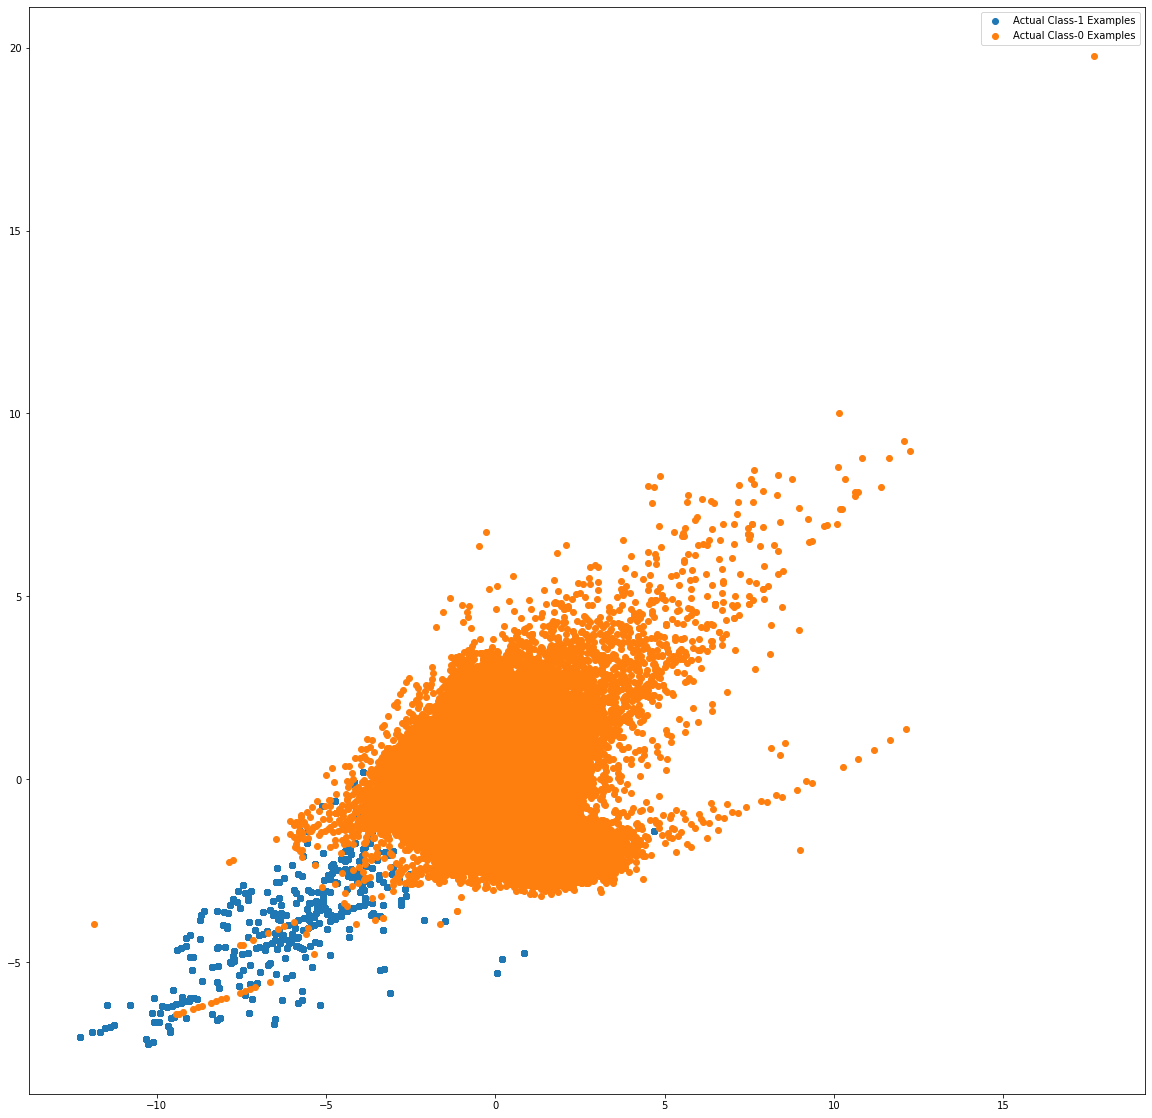

In [ ]:
var_imp = []
for i in xgb_over.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(xgb_over.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(xgb_over.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(xgb_over.feature_importances_)[-3])+1)

top_var_index = var_imp.index(np.sort(xgb_over.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(xgb_over.feature_importances_)[-2])

X_train_1 = X_over.to_numpy()[np.where(y_over==1.0)]
X_train_0 = X_over.to_numpy()[np.where(y_over==0.0)]

np.random.shuffle(X_train_0)

plt.figure(figsize=(20,20))

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()